# Company Default Data

### Objective:
A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, they aim to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, they foresee facilitating the following with the help of the tool:

Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.
Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.

### Format
The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is given below.

***Networth Next Year***: Net worth of the customer in the next year

***Total assets***: Total assets of customer

***Net worth***: Net worth of the customer of the present year

***Total income***: Total income of the customer

***Change in stock***: Difference between the current value of the stock and the value of stock in the last trading day

***Total expenses***: Total expenses done by the customer

***Profit after tax***: Profit after tax deduction

***PBDITA***: Profit before depreciation, income tax, and amortization

***PBT***: Profit before tax deduction

***Cash profit***: Total Cash profit

***PBDITA as % of total income***: PBDITA / Total income

***PBT as % of total income***: PBT / Total income

***PAT as % of total income***: PAT / Total income

***Cash profit as % of total income***: Cash Profit / Total income

***PAT as % of net worth***: PAT / Net worth

***Sales***: Sales done by the customer

***Income from financial services***: Income from financial services

***Other income***: Income from other sources

***Total capital***: Total capital of the customer


***Reserves and funds***: Total reserves and funds of the customer

***Borrowings***: Total amount borrowed by the customer


***Current liabilities & provisions***: current liabilities of the customer

***Deferred tax liability***: Future income tax customer will pay because of the current transaction

***Shareholders funds***: Amount of equity in a company which belongs to shareholders

***Cumulative retained profits***: Total cumulative profit retained by customer

***Capital employed***: Current asset minus current liabilities

***TOL/TNW***: Total liabilities of the customer divided by Total net worth

***Total term liabilities / tangible net worth***: Short + long term liabilities divided by tangible net worth

***Contingent liabilities / Net worth (%)***: Contingent liabilities / Net worth

***Contingent liabilities***: Liabilities because of uncertain events

***Net fixed assets***: The purchase price of all fixed assets

***Investments***: Total invested amount

***Current assets***: Assets that are expected to be converted to cash within a year

***Net working capital***: Difference between the current liabilities and current assets

***Quick ratio (times)***: Total cash divided by current liabilities

***Current ratio (times)***: Current assets divided by current liabilities

***Debt to equity ratio (times)***: Total liabilities divided by its shareholder equity

***Cash to current liabilities (times)***: Total liquid cash divided by current liabilities

***Cash to average cost of sales per day***: Total cash divided by the average cost of the sales

***Creditors turnover***: Net credit purchase divided by average trade creditors

***Debtors turnover***: Net credit sales divided by average accounts receivable

***Finished goods turnover***: Annual sales divided by average inventory

***WIP turnover***: The cost of goods sold for a period divided by the average inventory for that period

***Raw material turnover***: Cost of goods sold is divided by the average inventory for the same period


***Shares outstanding***: Number of issued shares minus the number of shares held in the company

***Equity face value***: cost of the equity at the time of issuing

***EPS***: Net income divided by the total number of outstanding share

***Adjusted EPS***: Adjusted net earnings divided by the weighted average number of common shares outstanding on a diluted 
basis during the plan year

***Total liabilities***: Sum of all types of liabilities

***PE on BSE***: Company's current stock price divided by its earnings per share


### Source:
Comp_Fin_Data.csv

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings 
warnings.filterwarnings( "ignore")

#### Importing the dataset

In [2]:
Company_Default = pd.read_csv('C:/Users/Vijay/Downloads/Company_FRA.csv')

In [3]:
#Top 5 Rows
Company_Default.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

In [4]:
#Bottom 5 Rows
Company_Default.tail()

Num  Networth Next Year  Total assets  Net worth  Total income  \
4251  4252                 0.2           0.4        0.2           NaN   
4252  4253                93.3         159.6       86.7         172.9   
4253  4254               932.2         833.8      664.6        2314.7   
4254  4255                64.6          95.0       48.5         110.5   
4255  4256                 0.0         384.6      111.3         345.8   

      Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
4251              NaN             NaN               NaN     NaN    NaN  ...   
4252              0.1           169.7               3.3    18.4    3.7  ...   
4253             32.1          2151.6             195.2   348.4  303.0  ...   
4254              4.6           113.5               1.6     9.7    2.6  ...   
4255             11.3           341.7              15.4    57.6   20.7  ...   

      Debtors turnover  Finished goods turnover  WIP turnover  \
4251              0.00                      NaN           NaN   
4252              1.80                    11.00          8.28   
4253              6.08                    59.28         31.14   
4254              3.71                    78.99         11.51   
4255              4.71                    53.37          8.33   

      Raw material turnover  Shares outstanding  Equity face value    EPS  \
4251                   0.00                 NaN                NaN   0.00   
4252                   9.88           8162700.0               10.0   0.42   
4253                   9.87           7479762.0               10.0  26.58   
4254                  14.95                 NaN                NaN   0.00   
4255                   3.74            960000.0               10.0  15.63   

      Adjusted EPS  Total liabilities  PE on BSE  
4251          0.00                0.4        NaN  
4252          0.42              159.6      16.81  
4253         26.58              833.8       5.69  
4254          0.00               95.0        NaN  
4255         15.63              384.6        NaN  

[5 rows x 51 columns]

#### Fixing messy column names (containing spaces) for ease of use

In [5]:
Company_Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [6]:
Company_Default.columns = Company_Default.columns.str.replace('.', 'to')

In [7]:
Company_Default.columns = Company_Default.columns.str.replace('/', ' by ')

In [8]:
Company_Default.columns = Company_Default.columns.str.replace(' (%)', '')

In [9]:
Company_Default.columns = Company_Default.columns.str.replace(' &', ' and')

In [10]:
Company_Default.columns = Company_Default.columns.str.replace(' (times)', '')

In [11]:
Company_Default.columns = Company_Default.columns.str.replace('as % of', 'to')

In [12]:
Company_Default.columns = Company_Default.columns.str.replace(' ', '_')

#### First, let us check the number of rows (observations) and the number of columns (variables).

In [13]:
print('The number of rows (observations) is',Company_Default.shape[0],'\n''The number of columns (variables) is',Company_Default.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


#### Data types of all variables

In [14]:
Company_Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [15]:
Company_Default.describe().T

count          mean  \
Num                                             4256.0  2.128500e+03   
Networth_Next_Year                              4256.0  1.344741e+03   
Total_assets                                    4256.0  3.573617e+03   
Net_worth                                       4256.0  1.351950e+03   
Total_income                                    4025.0  4.688190e+03   
Change_in_stock                                 3706.0  4.370248e+01   
Total_expenses                                  4091.0  4.356301e+03   
Profit_after_tax                                4102.0  2.950506e+02   
PBDITA                                          4102.0  6.059406e+02   
PBT                                             4102.0  4.102590e+02   
Cash_profit                                     4102.0  4.082675e+02   
PBDITA_to_total_income                          4177.0  3.179892e+00   
PBT_to_total_income                             4177.0 -1.819683e+01   
PAT_to_total_income                             4177.0 -2.003367e+01   
Cash_profit_to_total_income                     4177.0 -9.021278e+00   
PAT_to_net_worth                                4256.0  1.016786e+01   
Sales                                           3951.0  4.645685e+03   
Income_from_fincial_services                    3145.0  8.136006e+01   
Other_income                                    2700.0  5.595289e+01   
Total_capital                                   4251.0  2.245577e+02   
Reserves_and_funds                              4158.0  1.210562e+03   
Borrowings                                      3825.0  1.176248e+03   
Current_liabilities_and_provisions              4146.0  9.606314e+02   
Deferred_tax_liability                          2887.0  2.344951e+02   
Shareholders_funds                              4256.0  1.376487e+03   
Cumulative_retained_profits                     4211.0  9.371820e+02   
Capital_employed                                4256.0  2.433618e+03   
TOL_by_TNW                                      4256.0  4.025343e+00   
Total_term_liabilities__by__tangible_net_worth  4256.0  1.854288e+00   
Contingent_liabilities__by__Net_worth           4256.0  5.570750e+01   
Contingent_liabilities                          2854.0  9.485522e+02   
Net_fixed_assets                                4124.0  1.209487e+03   
Investments                                     2541.0  7.218659e+02   
Current_assets                                  4176.0  1.350360e+03   
Net_working_capital                             4219.0  1.628742e+02   
Quick_ratio                                     4151.0  1.497355e+00   
Current_ratio                                   4151.0  2.257398e+00   
Debt_to_equity_ratio                            4256.0  2.871563e+00   
Cash_to_current_liabilities                     4151.0  5.284197e-01   
Cash_to_average_cost_of_sales_per_day           4156.0  1.451579e+02   
Creditors_turnover                              3865.0  1.681226e+01   
Debtors_turnover                                3871.0  1.792903e+01   
Finished_goods_turnover                         3382.0  8.436999e+01   
WIP_turnover                                    3492.0  2.868451e+01   
Raw_material_turnover                           3828.0  1.773393e+01   
Shares_outstanding                              3446.0  2.376491e+07   
Equity_face_value                               3446.0 -1.094829e+03   
EPS                                             4256.0 -1.962175e+02   
Adjusted_EPS                                    4256.0 -1.975276e+02   
Total_liabilities                               4256.0  3.573617e+03   
PE_on_BSE                                       1629.0  5.546229e+01   

                                                         std           min  \
Num                                             1.228746e+03  1.000000e+00   
Networth_Next_Year                              1.593674e+04 -7.426560e+04   
Total_assets                                    3.007444e+04  1.000000

#### Check Duplicate Values

In [16]:
Company_Default.duplicated().sum()

0

In [17]:
Company_Default.drop('Num', axis = 1, inplace = True)

## Univariate Analysis

### Numeric Columns

In [18]:
def count_outlier(col):
    count=0
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    for x in col:
        if x > upper_range or x < lower_range:
            count=count+1
    return count

Networth_Next_Year
Count : 4256
Number of outliers: 624


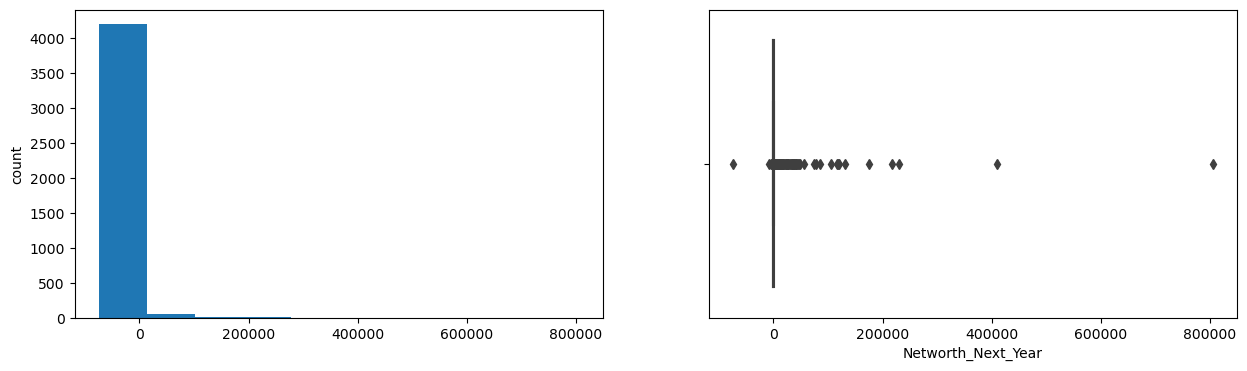

Total_assets
Count : 4256
Number of outliers: 585


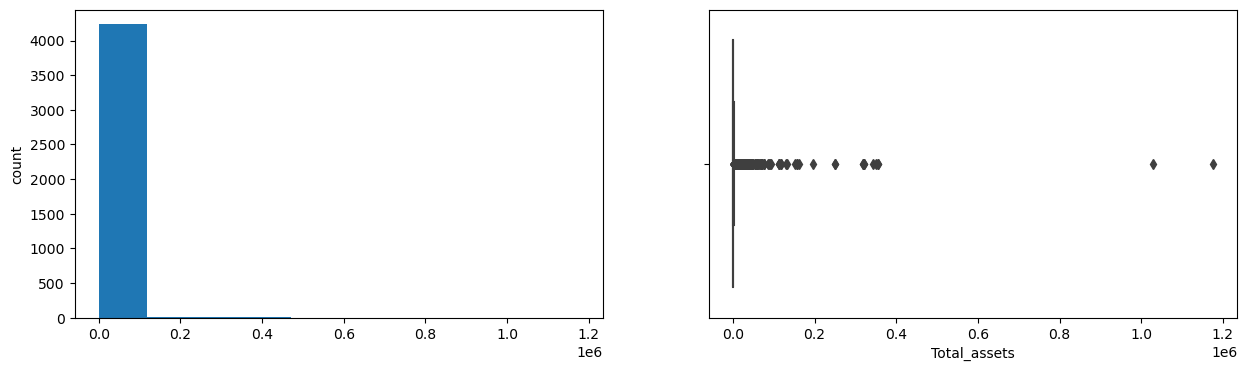

Net_worth
Count : 4256
Number of outliers: 595


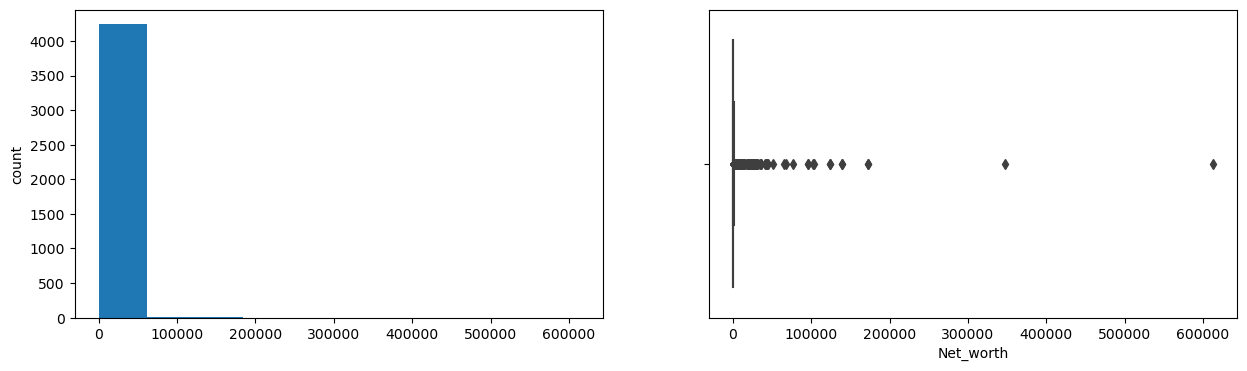

Total_income
Count : 4025
Number of outliers: 0


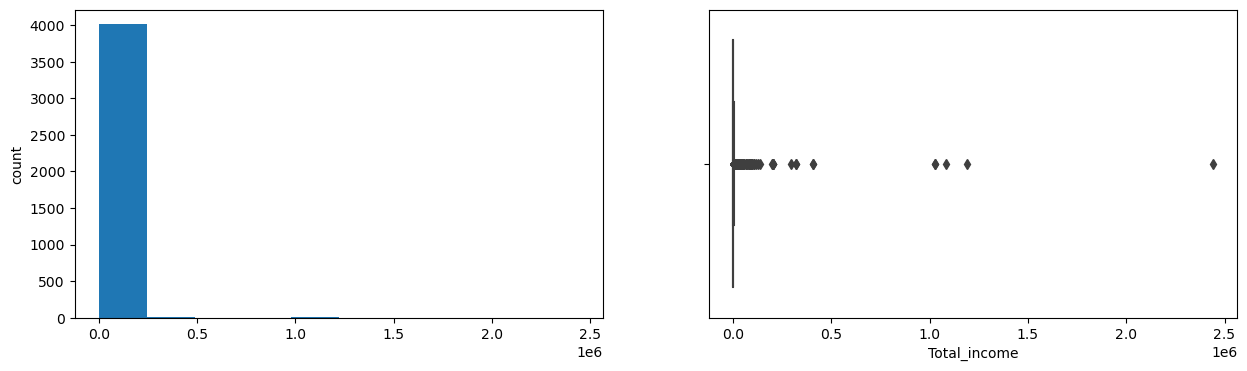

Change_in_stock
Count : 3706
Number of outliers: 0


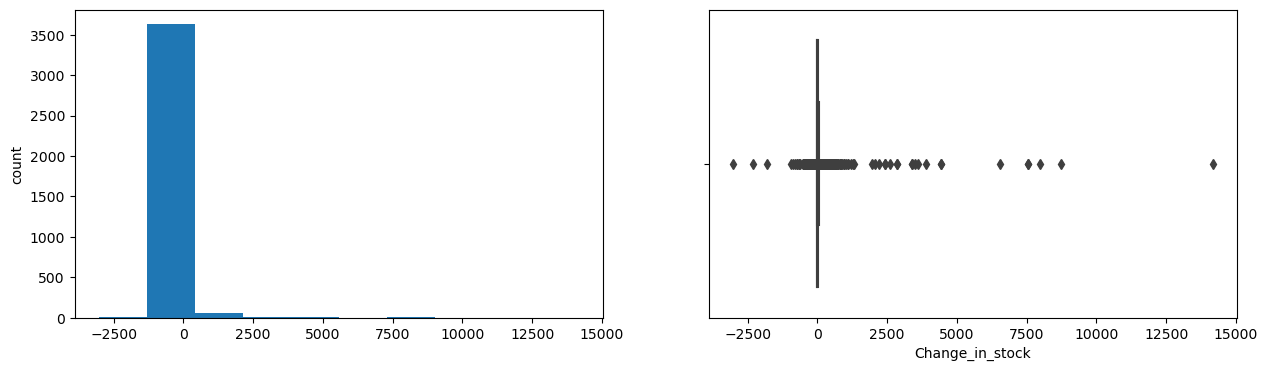

Total_expenses
Count : 4091
Number of outliers: 0


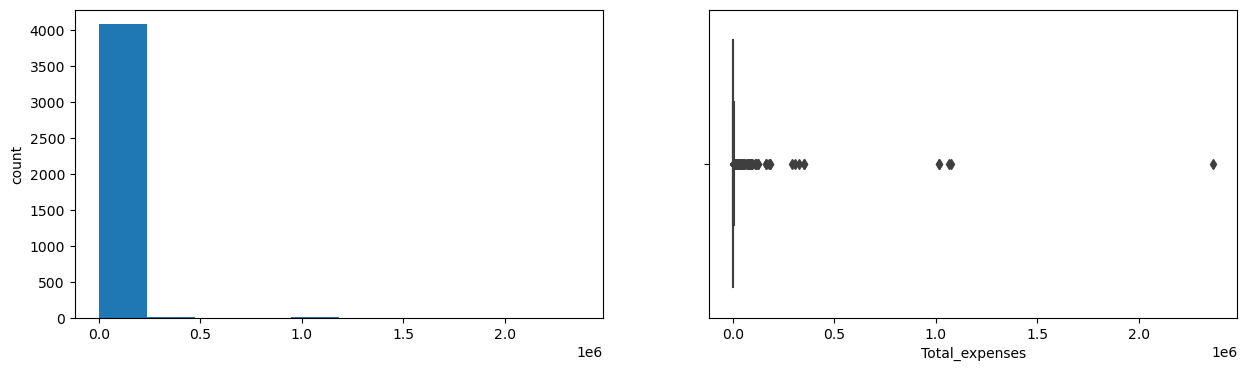

Profit_after_tax
Count : 4102
Number of outliers: 0


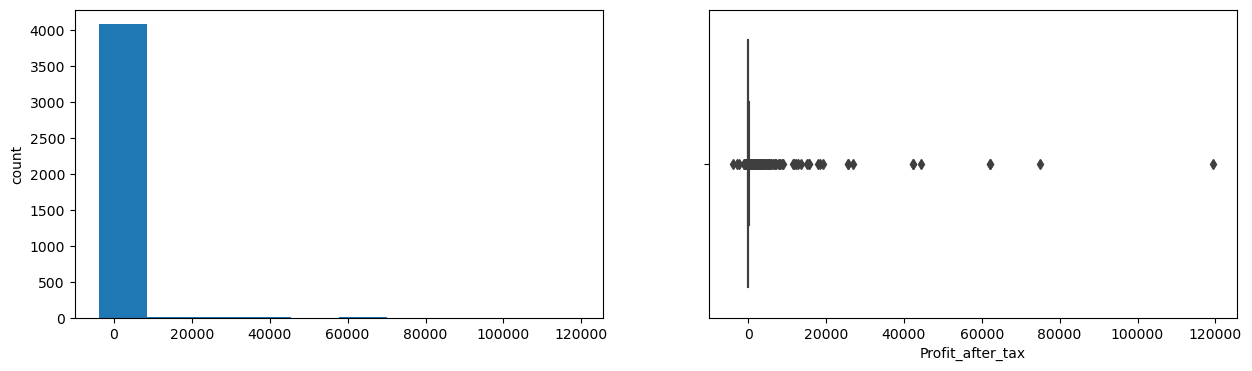

PBDITA
Count : 4102
Number of outliers: 0


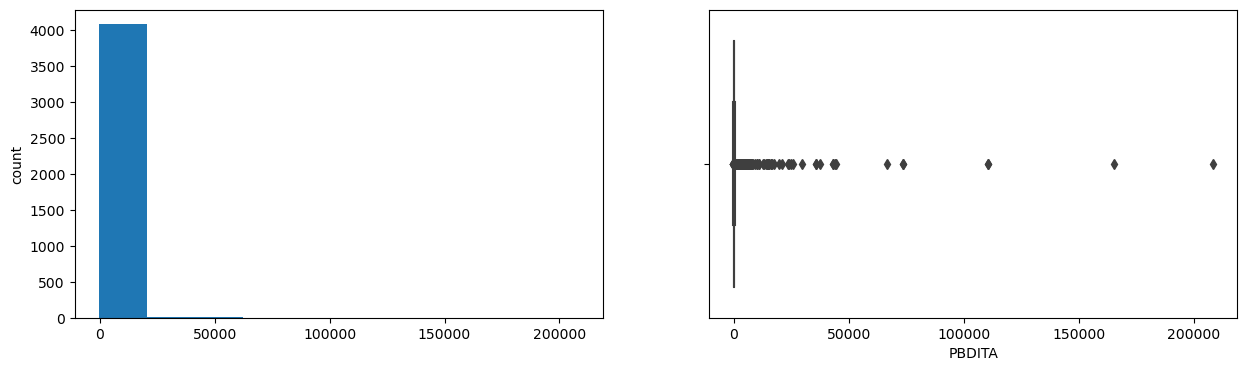

PBT
Count : 4102
Number of outliers: 0


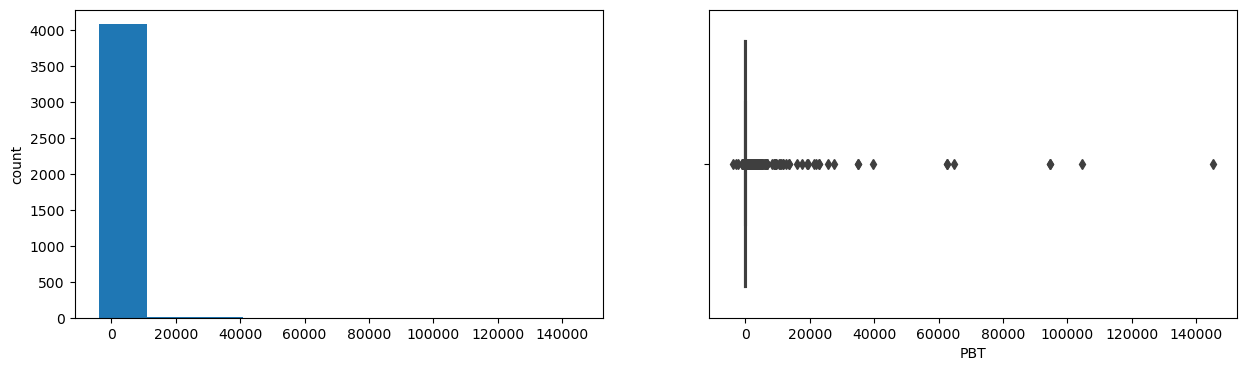

Cash_profit
Count : 4102
Number of outliers: 0


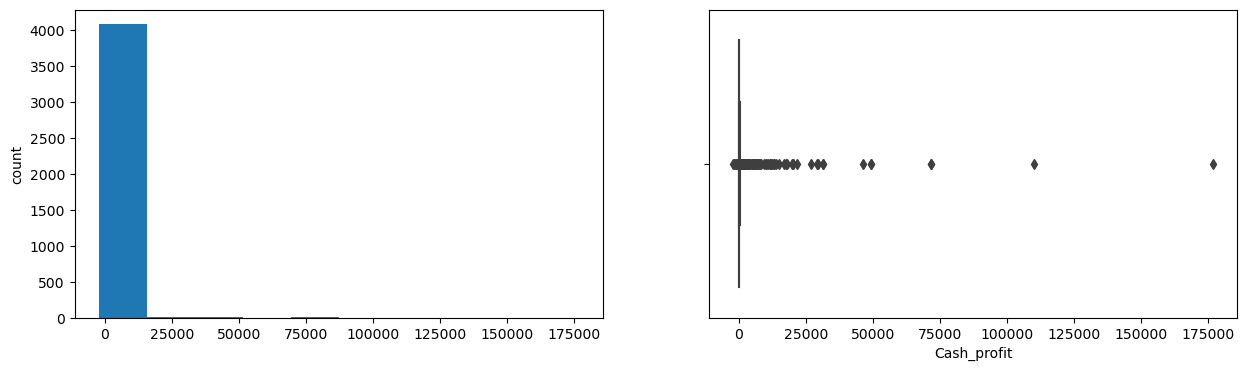

PBDITA_to_total_income
Count : 4177
Number of outliers: 0


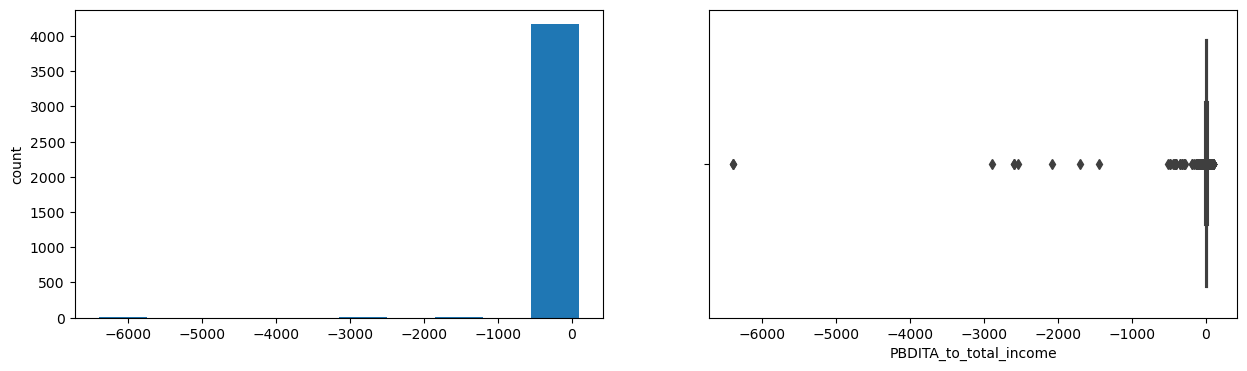

PBT_to_total_income
Count : 4177
Number of outliers: 0


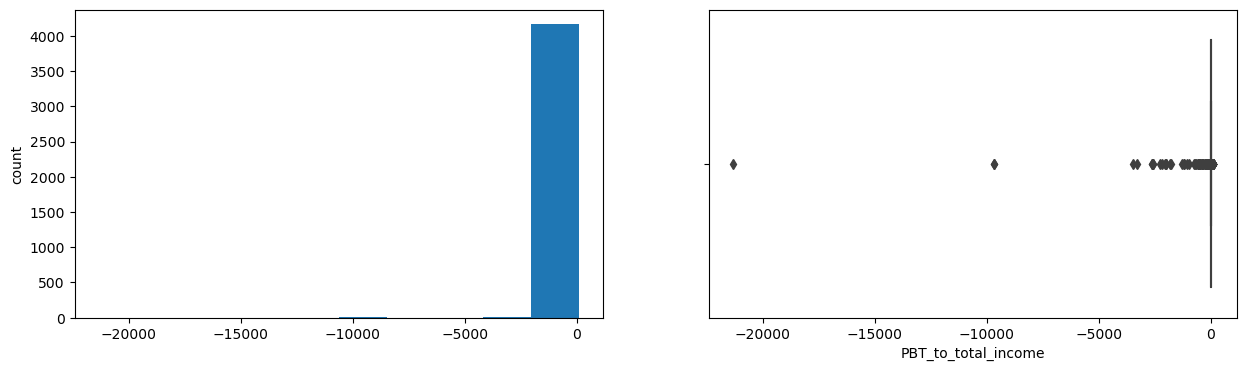

PAT_to_total_income
Count : 4177
Number of outliers: 0


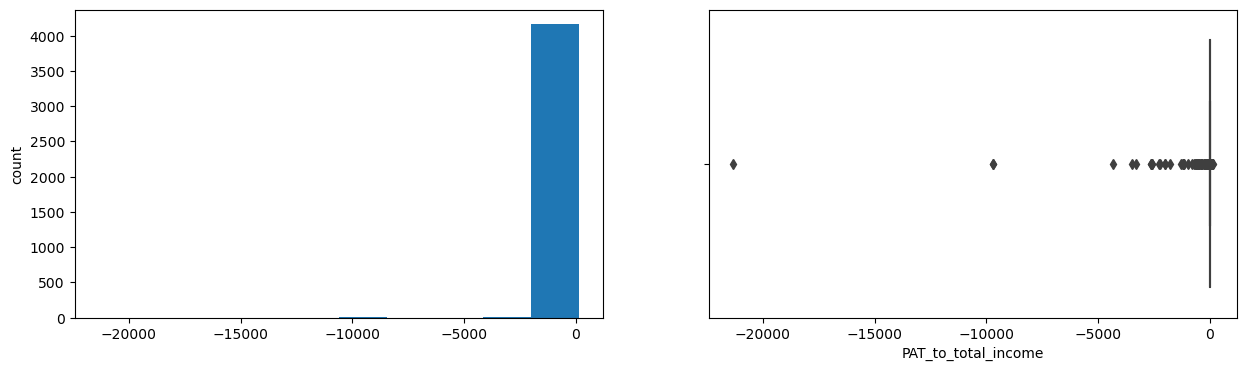

Cash_profit_to_total_income
Count : 4177
Number of outliers: 0


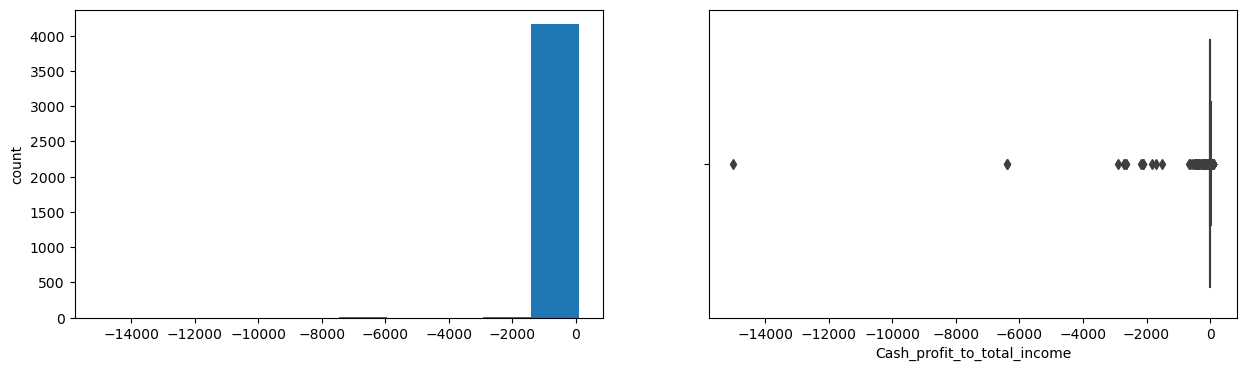

PAT_to_net_worth
Count : 4256
Number of outliers: 427


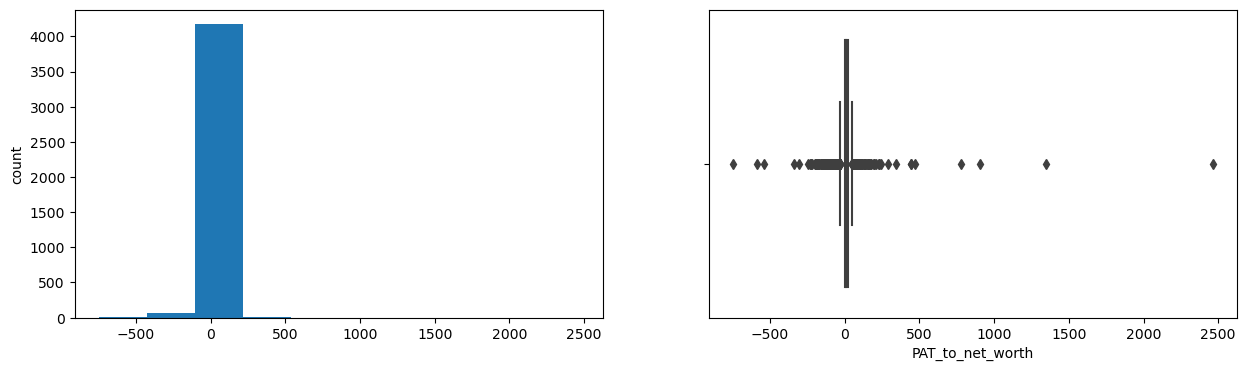

Sales
Count : 3951
Number of outliers: 0


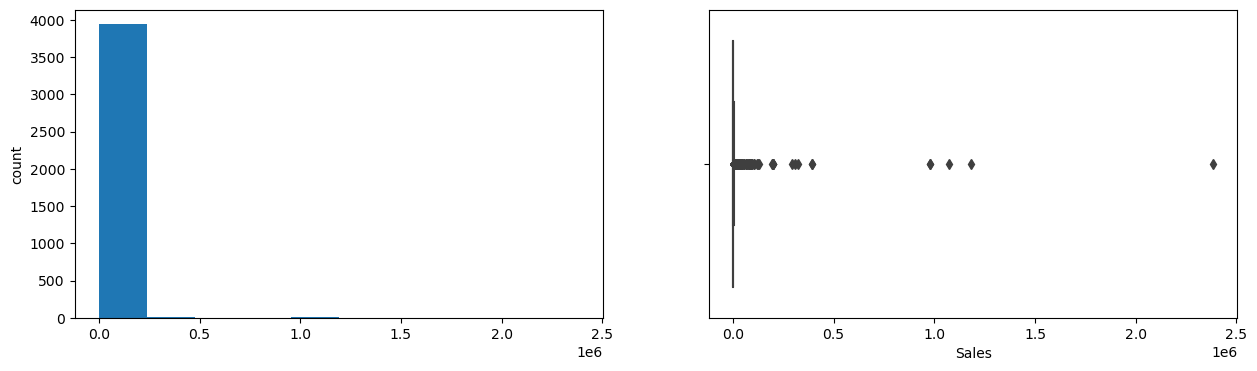

Income_from_fincial_services
Count : 3145
Number of outliers: 0


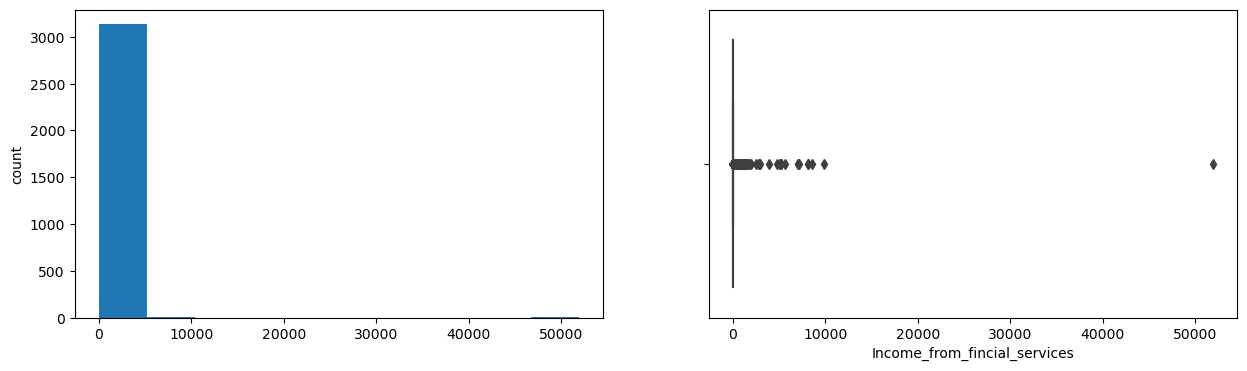

Other_income
Count : 2700
Number of outliers: 0


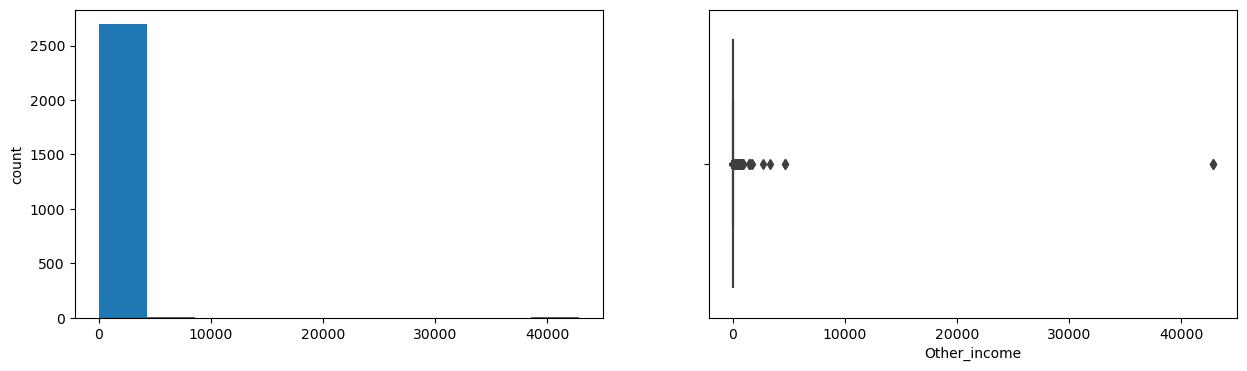

Total_capital
Count : 4251
Number of outliers: 0


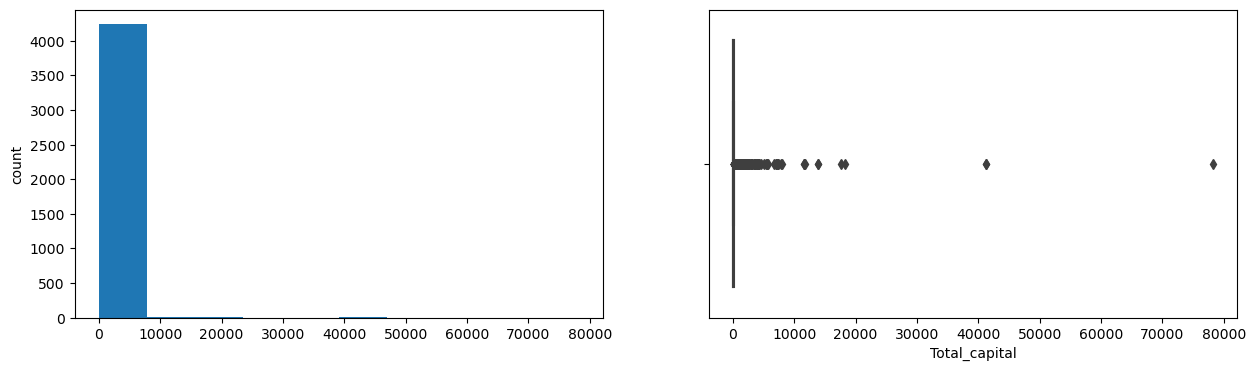

Reserves_and_funds
Count : 4158
Number of outliers: 0


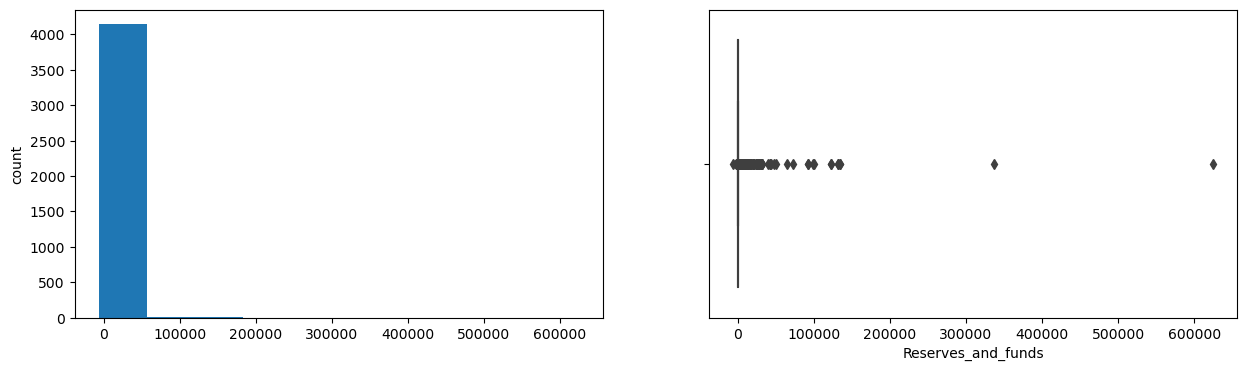

Borrowings
Count : 3825
Number of outliers: 0


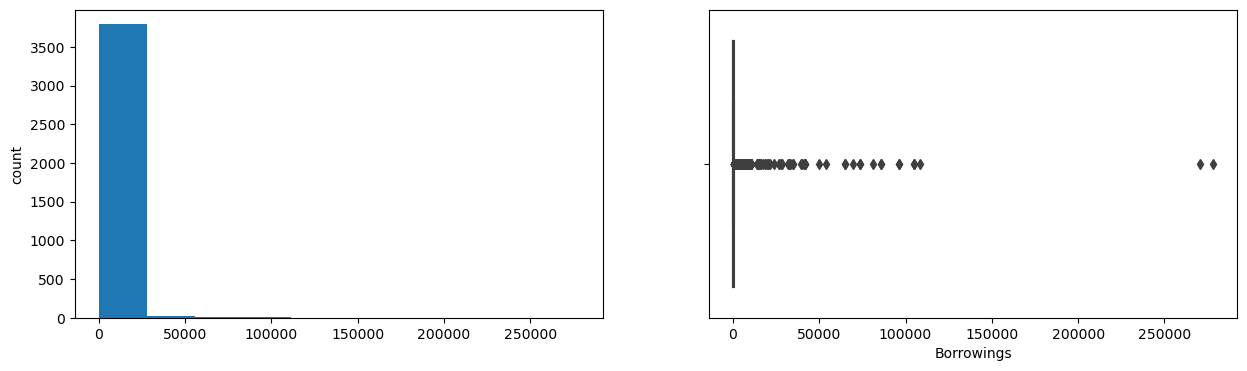

Current_liabilities_and_provisions
Count : 4146
Number of outliers: 0


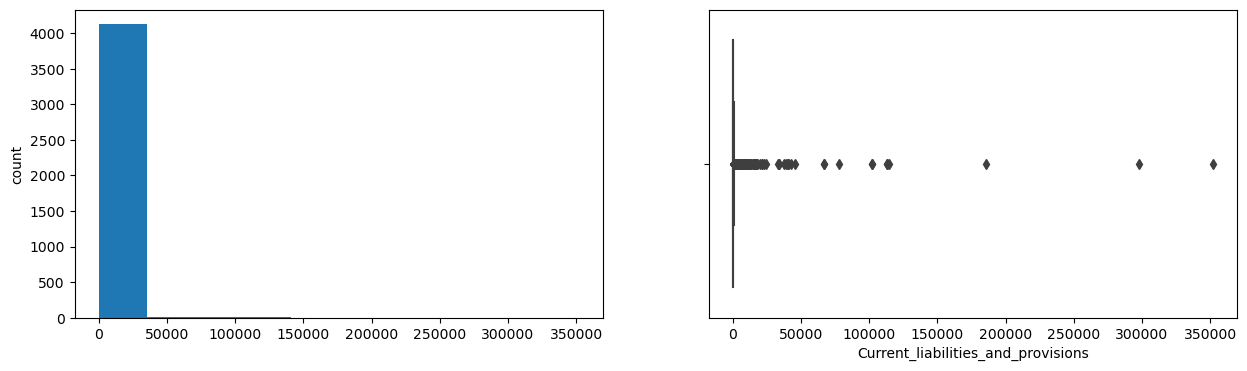

Deferred_tax_liability
Count : 2887
Number of outliers: 0


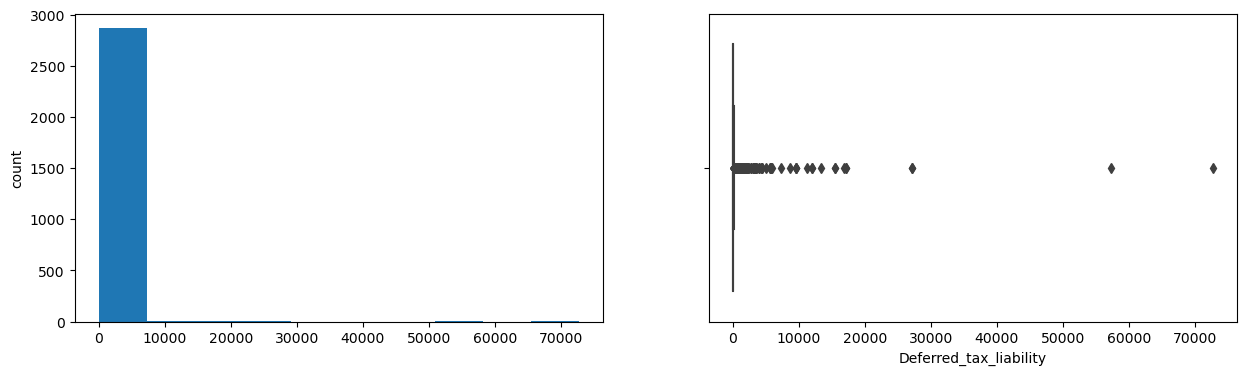

Shareholders_funds
Count : 4256
Number of outliers: 588


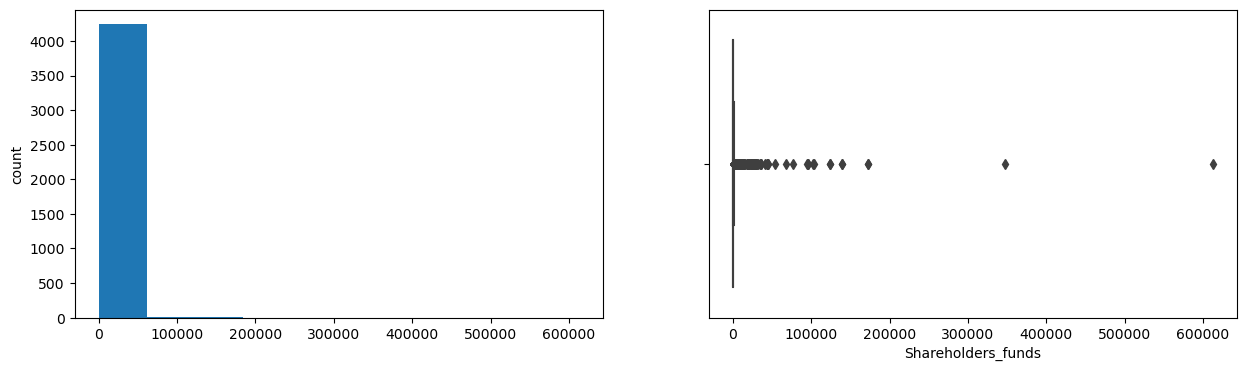

Cumulative_retained_profits
Count : 4211
Number of outliers: 0


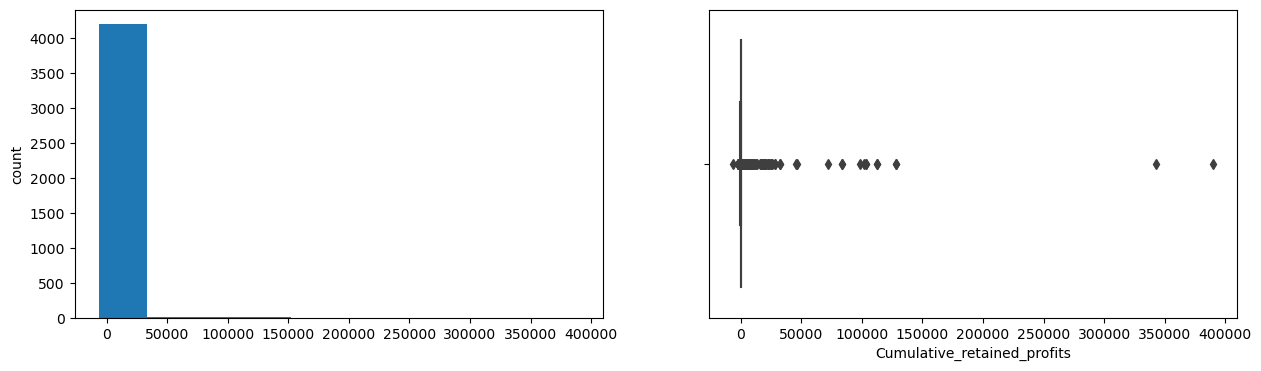

Capital_employed
Count : 4256
Number of outliers: 572


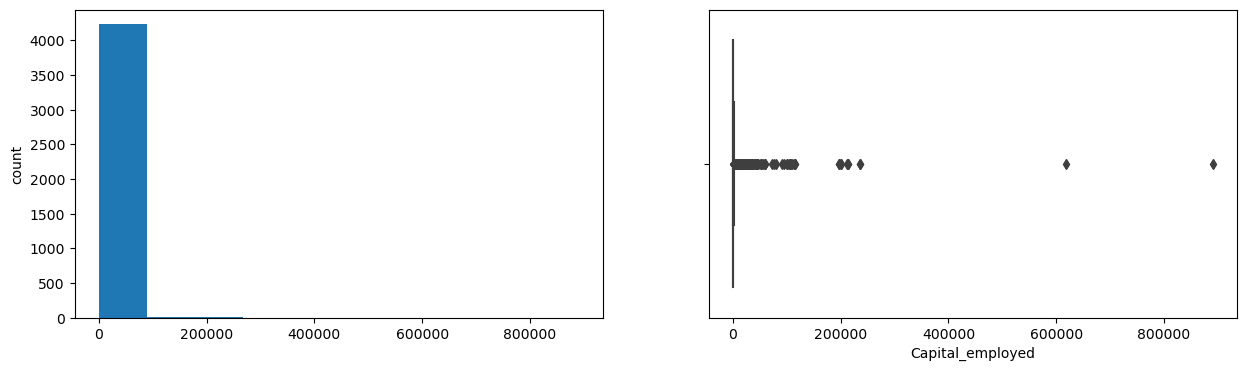

TOL_by_TNW
Count : 4256
Number of outliers: 414


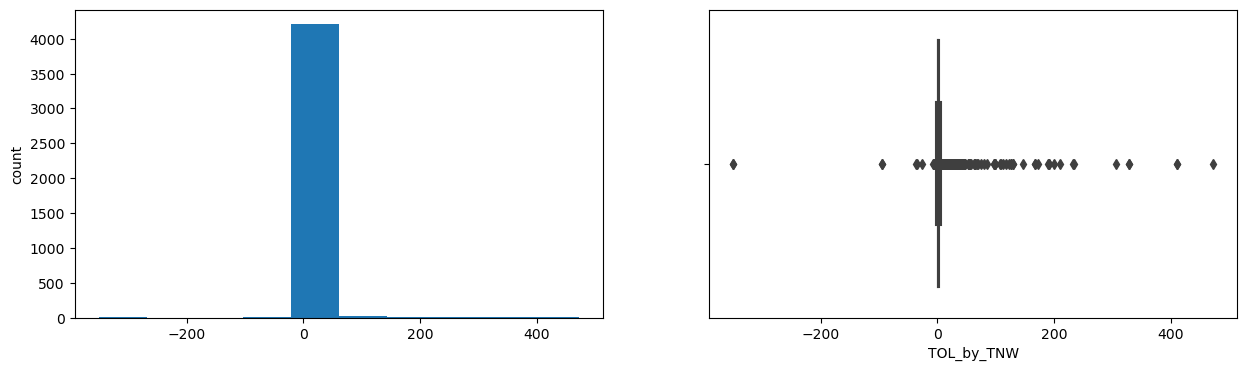

Total_term_liabilities__by__tangible_net_worth
Count : 4256
Number of outliers: 406


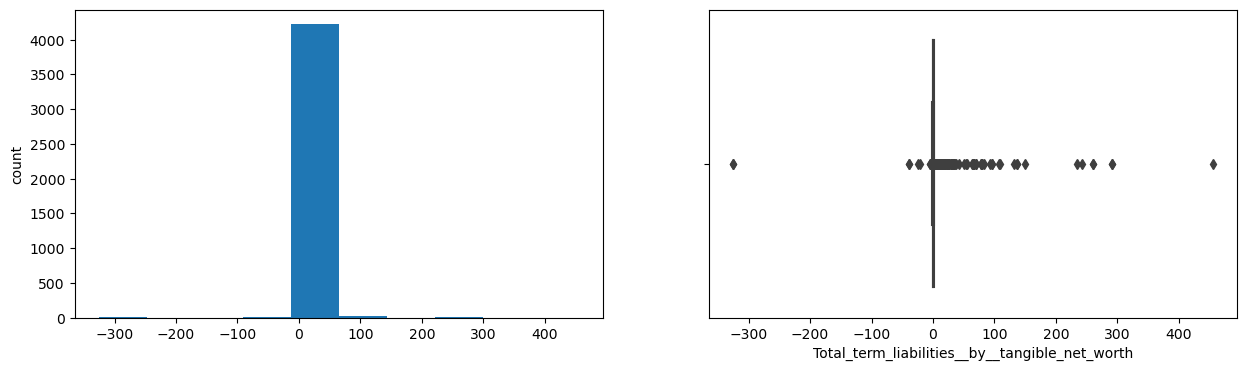

Contingent_liabilities__by__Net_worth
Count : 4256
Number of outliers: 478


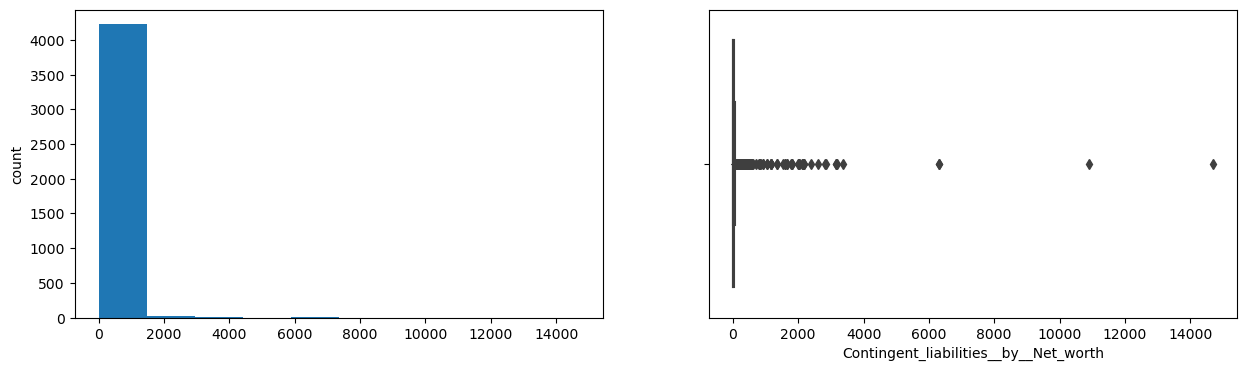

Contingent_liabilities
Count : 2854
Number of outliers: 0


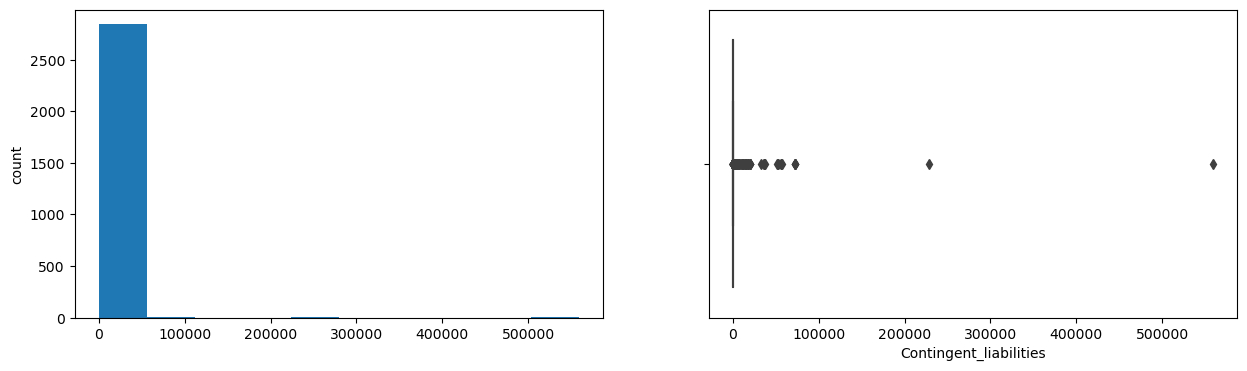

Net_fixed_assets
Count : 4124
Number of outliers: 0


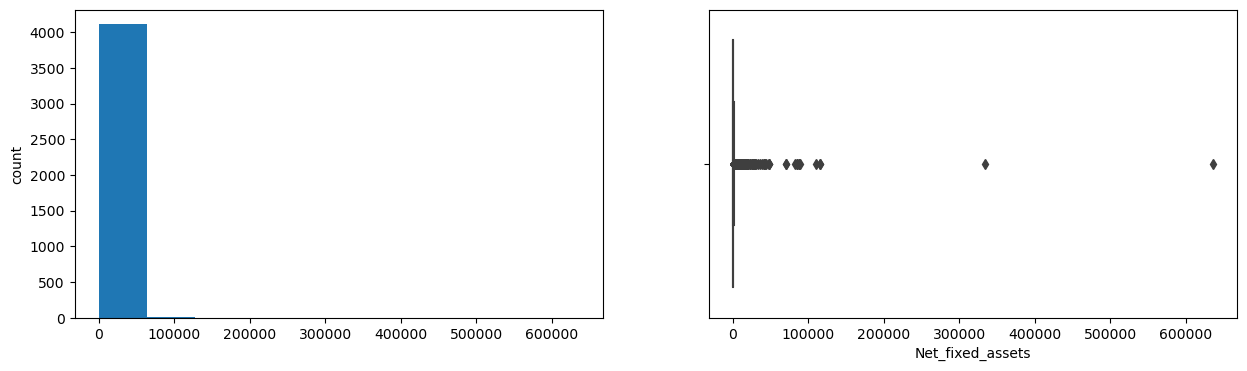

Investments
Count : 2541
Number of outliers: 0


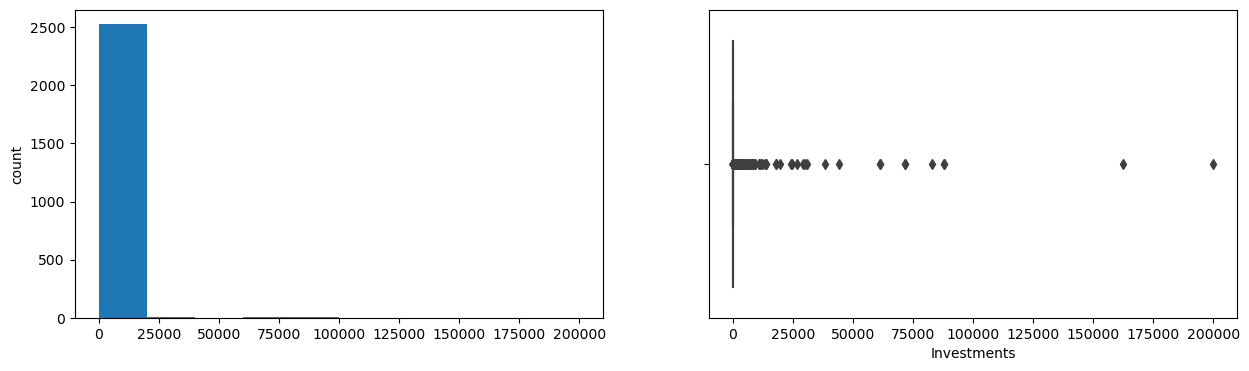

Current_assets
Count : 4176
Number of outliers: 0


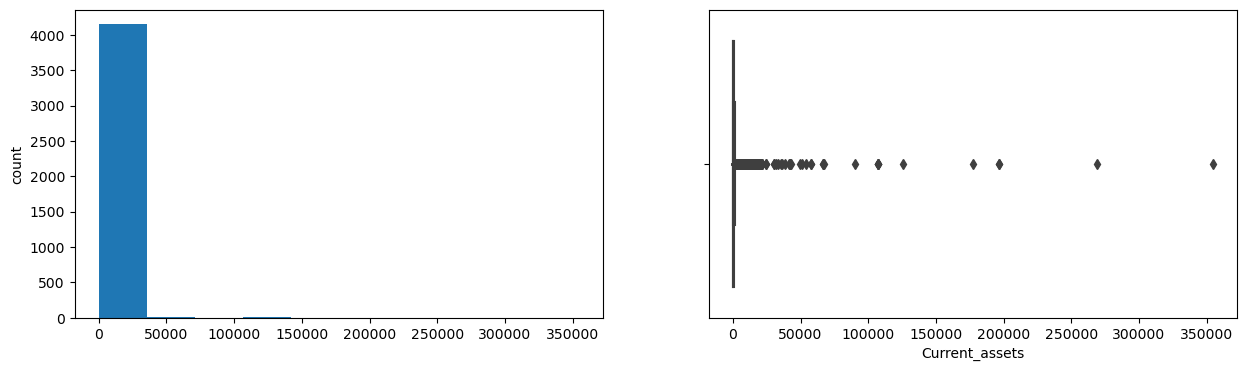

Net_working_capital
Count : 4219
Number of outliers: 0


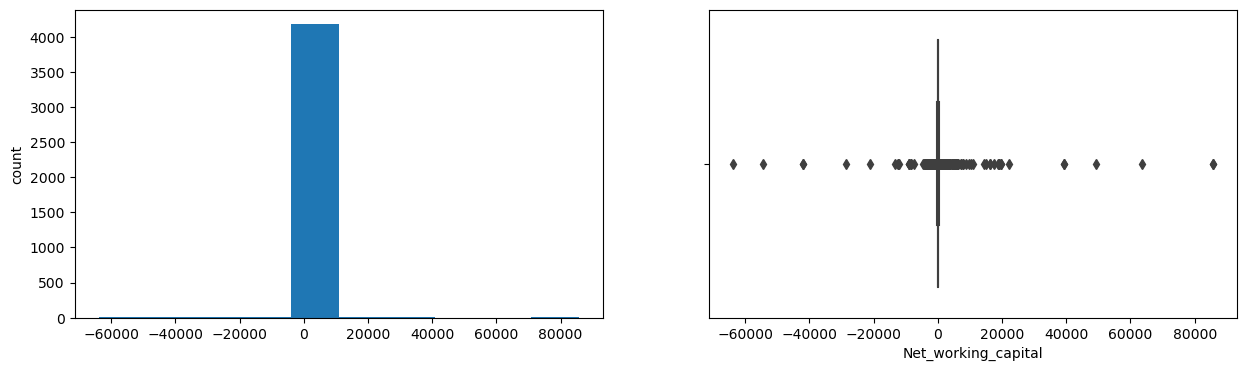

Quick_ratio
Count : 4151
Number of outliers: 0


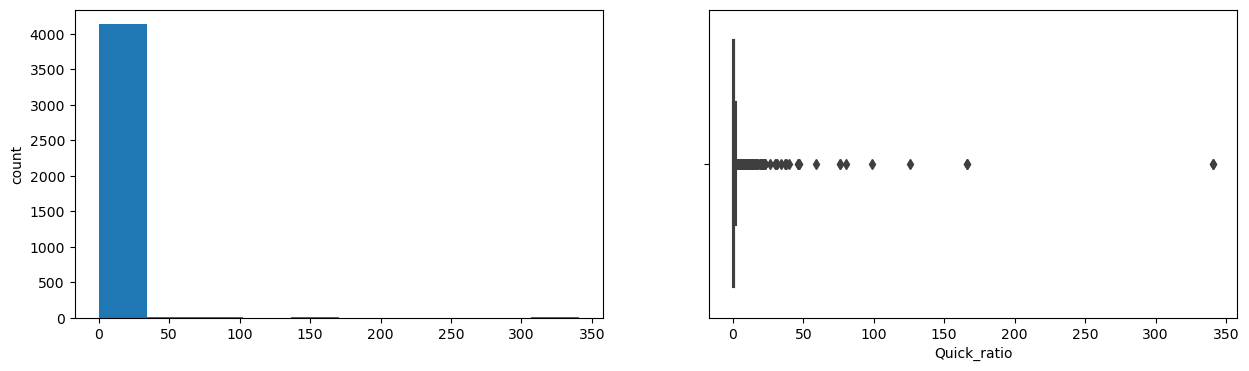

Current_ratio
Count : 4151
Number of outliers: 0


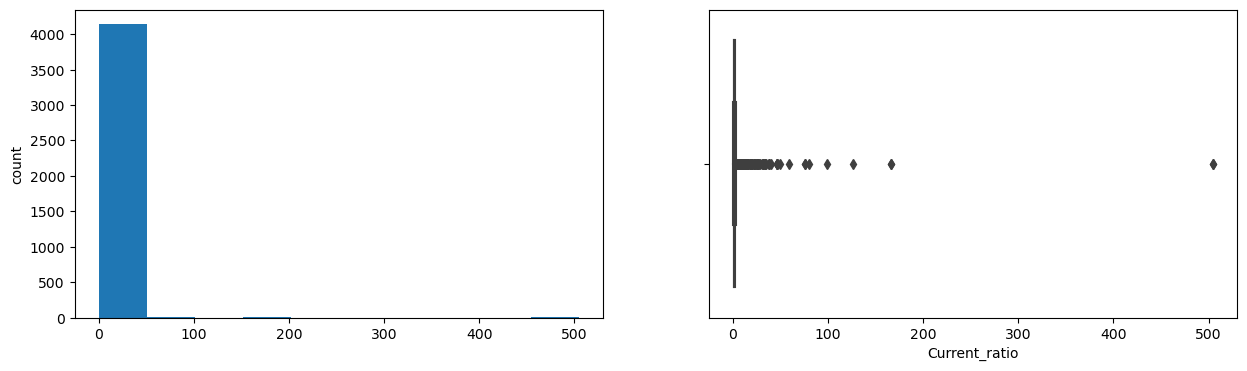

Debt_to_equity_ratio
Count : 4256
Number of outliers: 381


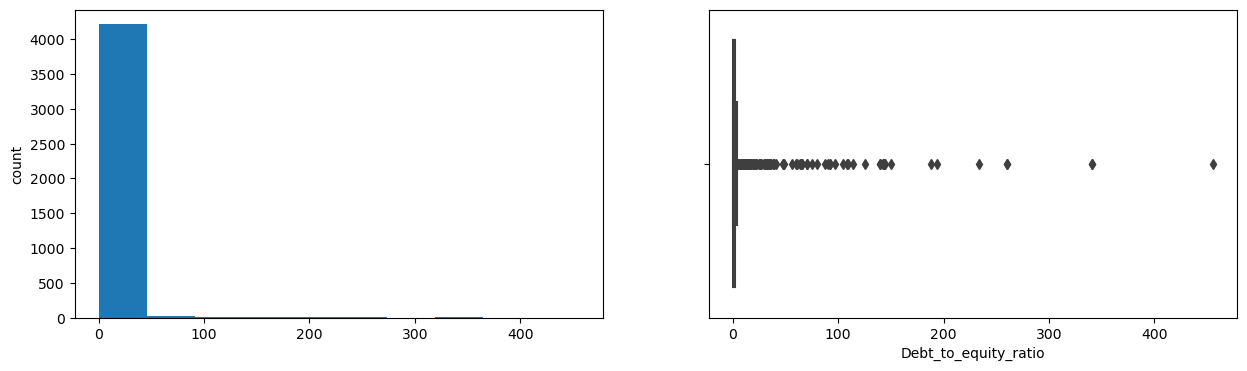

Cash_to_current_liabilities
Count : 4151
Number of outliers: 0


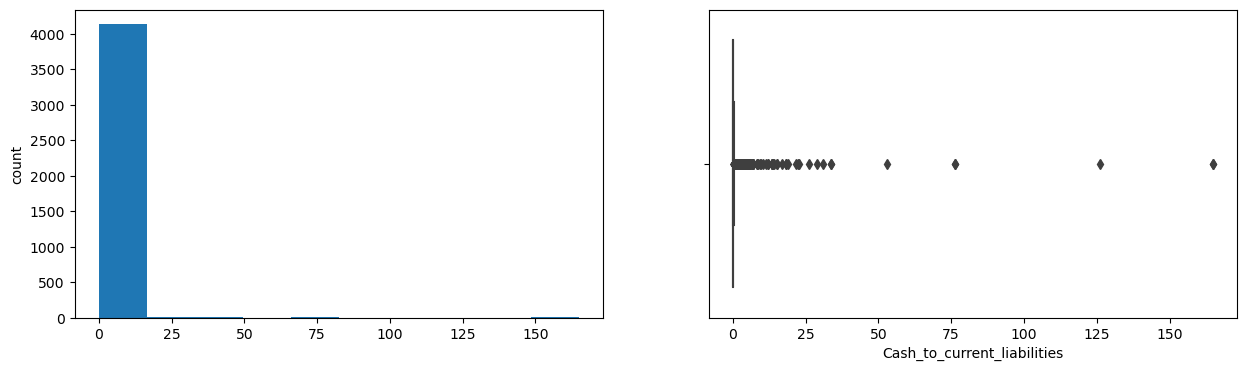

Cash_to_average_cost_of_sales_per_day
Count : 4156
Number of outliers: 0


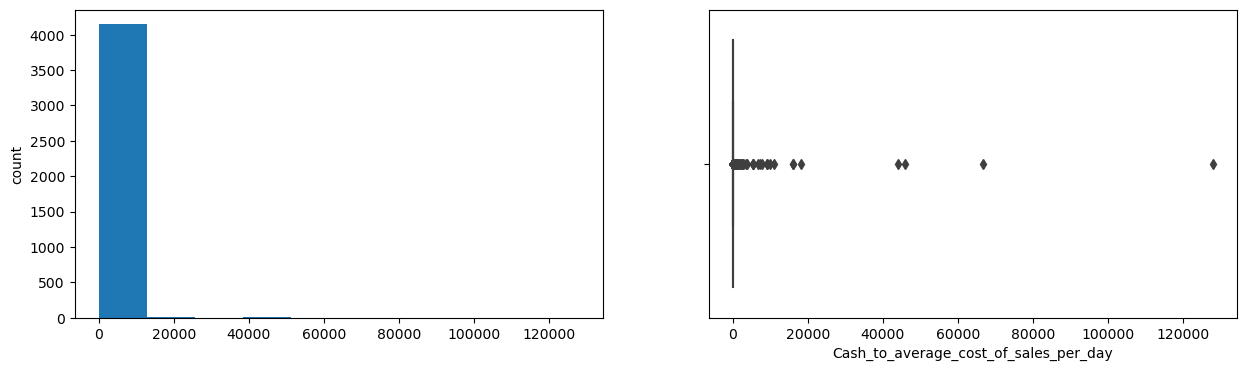

Creditors_turnover
Count : 3865
Number of outliers: 0


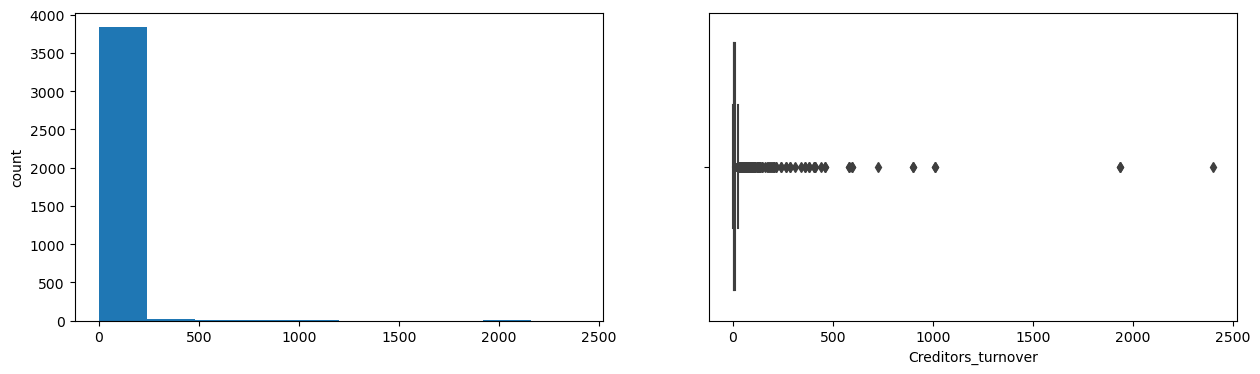

Debtors_turnover
Count : 3871
Number of outliers: 0


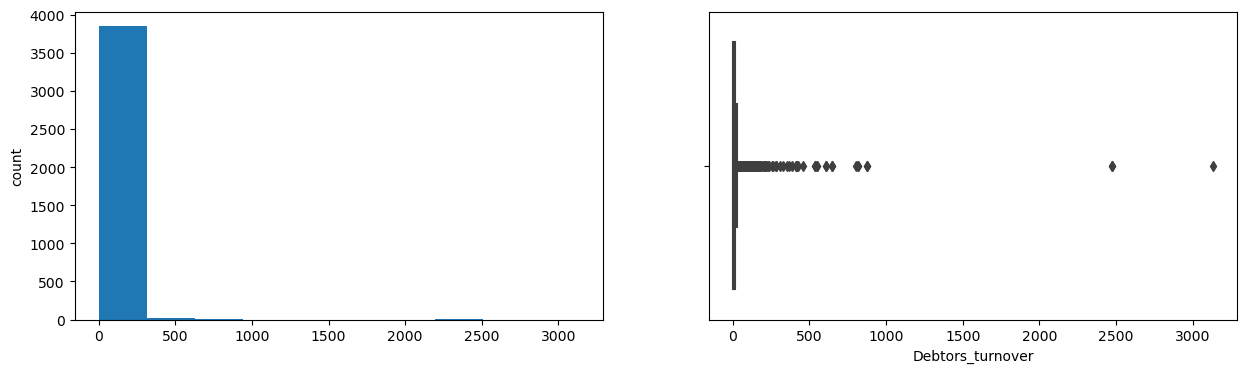

Finished_goods_turnover
Count : 3382
Number of outliers: 0


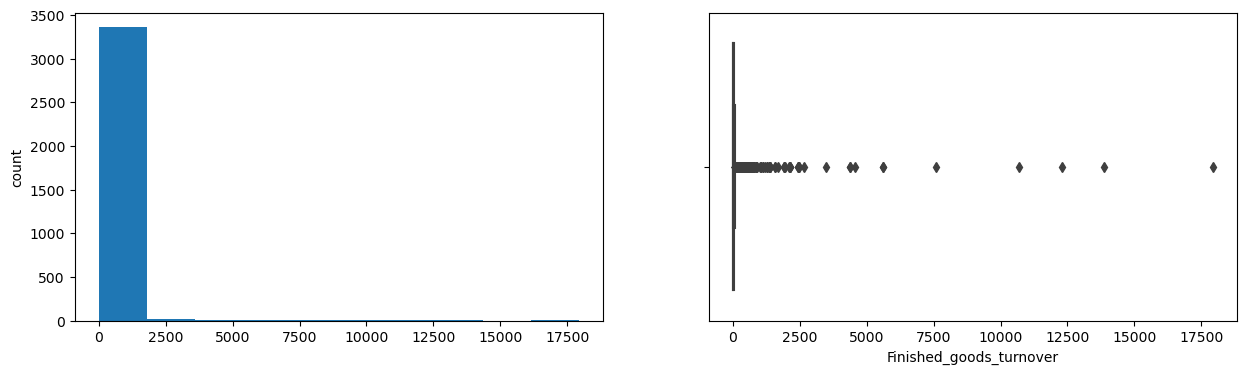

WIP_turnover
Count : 3492
Number of outliers: 0


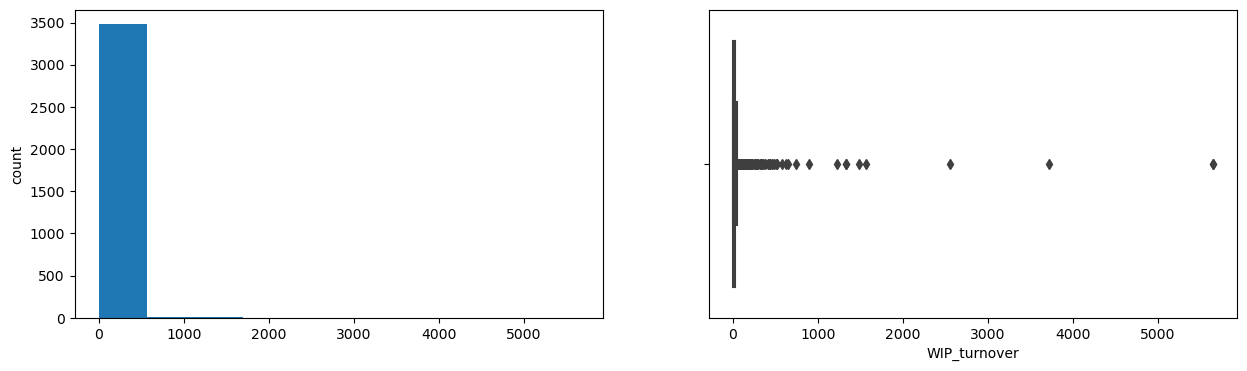

Raw_material_turnover
Count : 3828
Number of outliers: 0


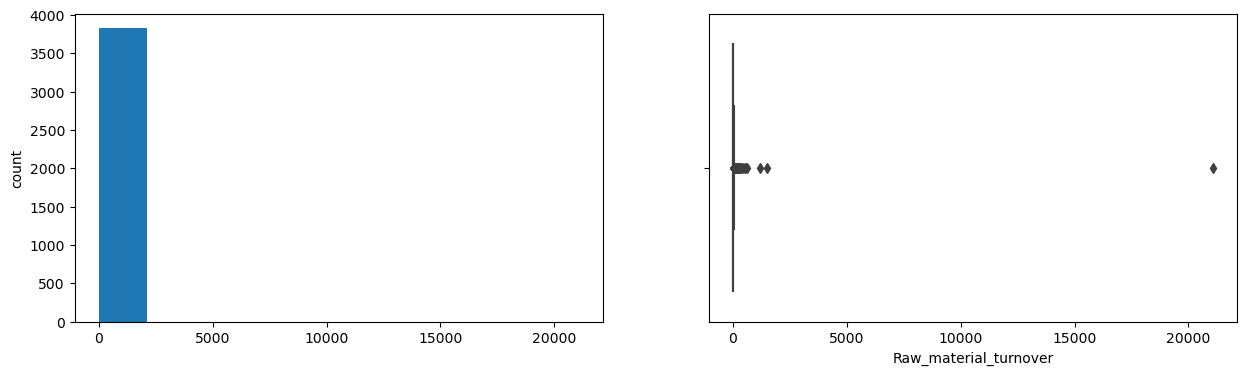

Shares_outstanding
Count : 3446
Number of outliers: 0


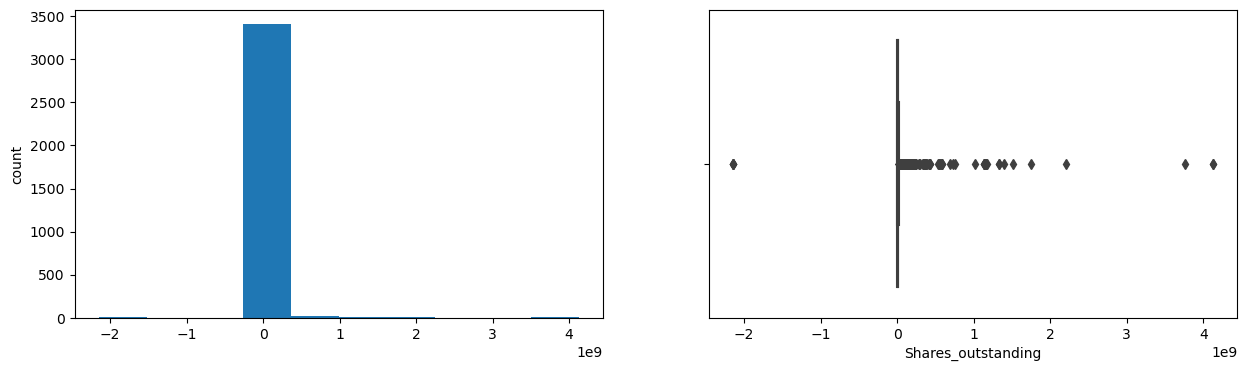

Equity_face_value
Count : 3446
Number of outliers: 0


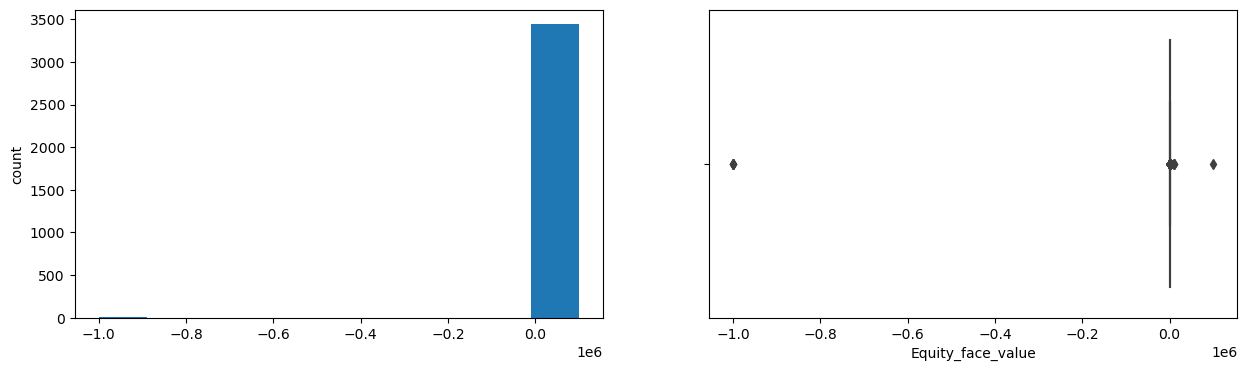

EPS
Count : 4256
Number of outliers: 638


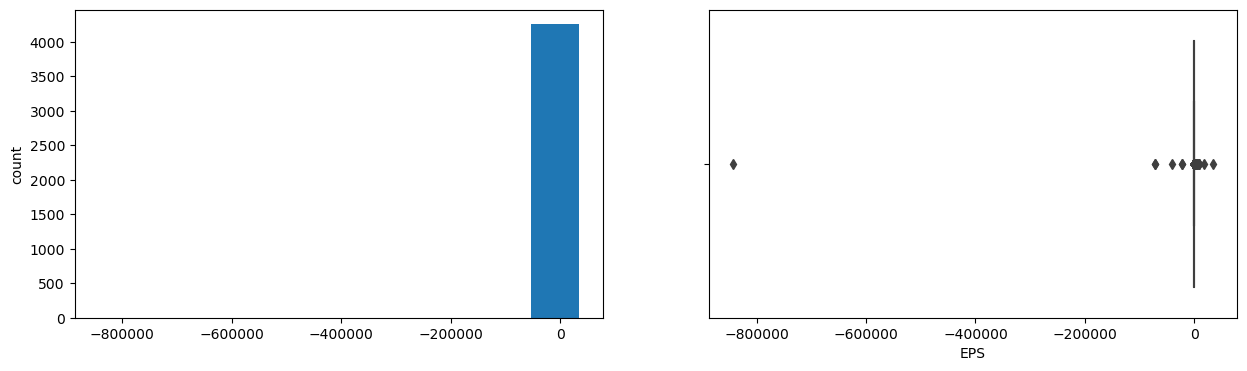

Adjusted_EPS
Count : 4256
Number of outliers: 694


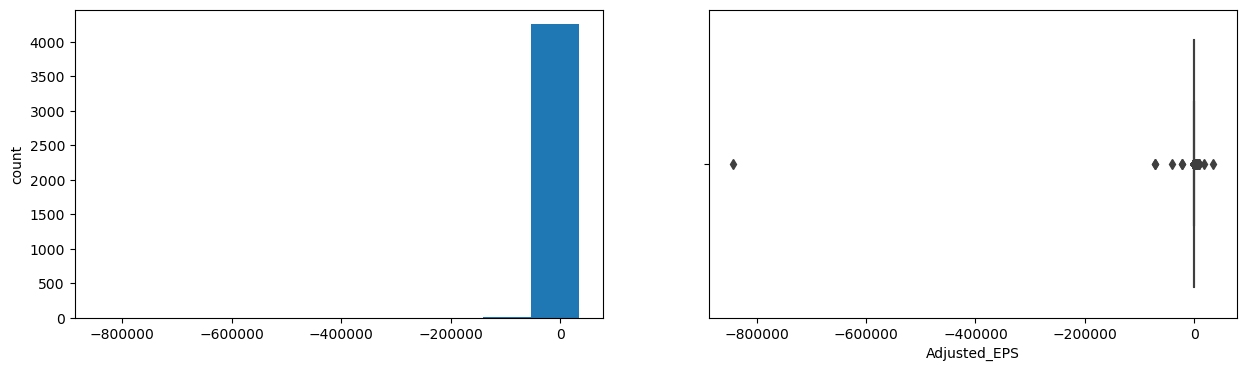

Total_liabilities
Count : 4256
Number of outliers: 585


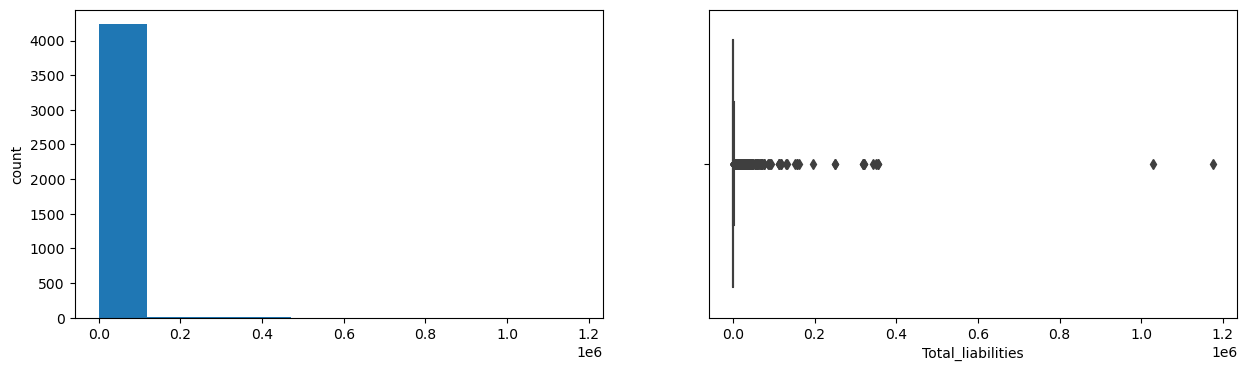

PE_on_BSE
Count : 1629
Number of outliers: 0


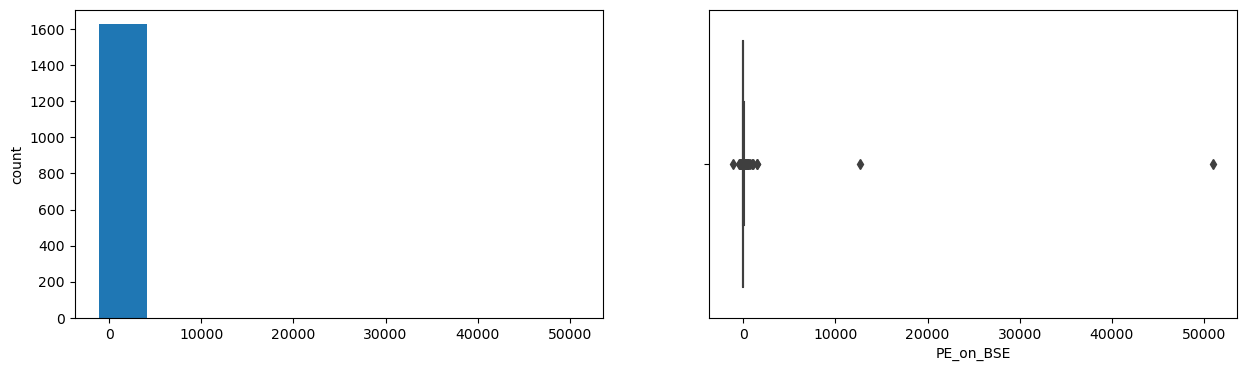

In [19]:
for col in Company_Default.columns:
    print(col)
    
    print('Count :', round(Company_Default[col].count()))
    print('Number of outliers:', count_outlier(Company_Default[col]))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    Company_Default[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=Company_Default[col])
    plt.show()

### Correlation heatmap

In [20]:
Company_Default.corr()

Networth_Next_Year  \
Networth_Next_Year                                        1.000000   
Total_assets                                              0.877803   
Net_worth                                                 0.930135   
Total_income                                              0.710953   
Change_in_stock                                           0.345199   
Total_expenses                                            0.690526   
Profit_after_tax                                          0.867992   
PBDITA                                                    0.872395   
PBT                                                       0.833797   
Cash_profit                                               0.906610   
PBDITA_to_total_income                                    0.007173   
PBT_to_total_income                                       0.006385   
PAT_to_total_income                                       0.005965   
Cash_profit_to_total_income                               0.006330   
PAT_to_net_worth                                          0.021671   
Sales                                                     0.716262   
Income_from_fincial_services                              0.520435   
Other_income                                              0.134670   
Total_capital                                             0.349069   
Reserves_and_funds                                        0.938546   
Borrowings                                                0.783406   
Current_liabilities_and_provisions                        0.666964   
Deferred_tax_liability                                    0.893295   
Shareholders_funds                                        0.929903   
Cumulative_retained_profits                               0.897528   
Capital_employed                                          0.901214   
TOL_by_TNW                                               -0.010461   
Total_term_liabilities__by__tangible_net_worth           -0.006422   
Contingent_liabilities__by__Net_worth                    -0.001563   
Contingent_liabilities                                    0.918809   
Net_fixed_assets                                          0.929506   
Investments                                               0.787223   
Current_assets                                            0.654580   
Net_working_capital                                      -0.065879   
Quick_ratio                                              -0.006067   
Current_ratio                                            -0.005920   
Debt_to_equity_ratio                                     -0.011834   
Cash_to_current_liabilities                              -0.002498   
Cash_to_average_cost_of_sales_per_day                    -0.058829   
Creditors_turnover                                       -0.007441   
Debtors_turnover                                          0.005430   
Finished_goods_turnover                                  -0.006176   
WIP_turnover                                             -0.006573   
Raw_material_turnover                                    -0.001818   
Shares_outstanding                                        0.385854   
Equity_face_value                                         0.004116   
EPS                                                       0.003431   
Adjusted_EPS                                              0.003344   
Total_liabilities                                         0.877803   
PE_on_BSE                                                -0.003430   

                                                Total_assets  Net_worth  \
Networth_Next_Year                                  0.877803   0.930135   
Total_assets                                        1.000000   0.959404   
Net_worth                                           0.959404   1.000000   
Total_income                                        0.868607   0.783831   
Change_in_stock                                     0.470735   0.393760   
Total_expenses             

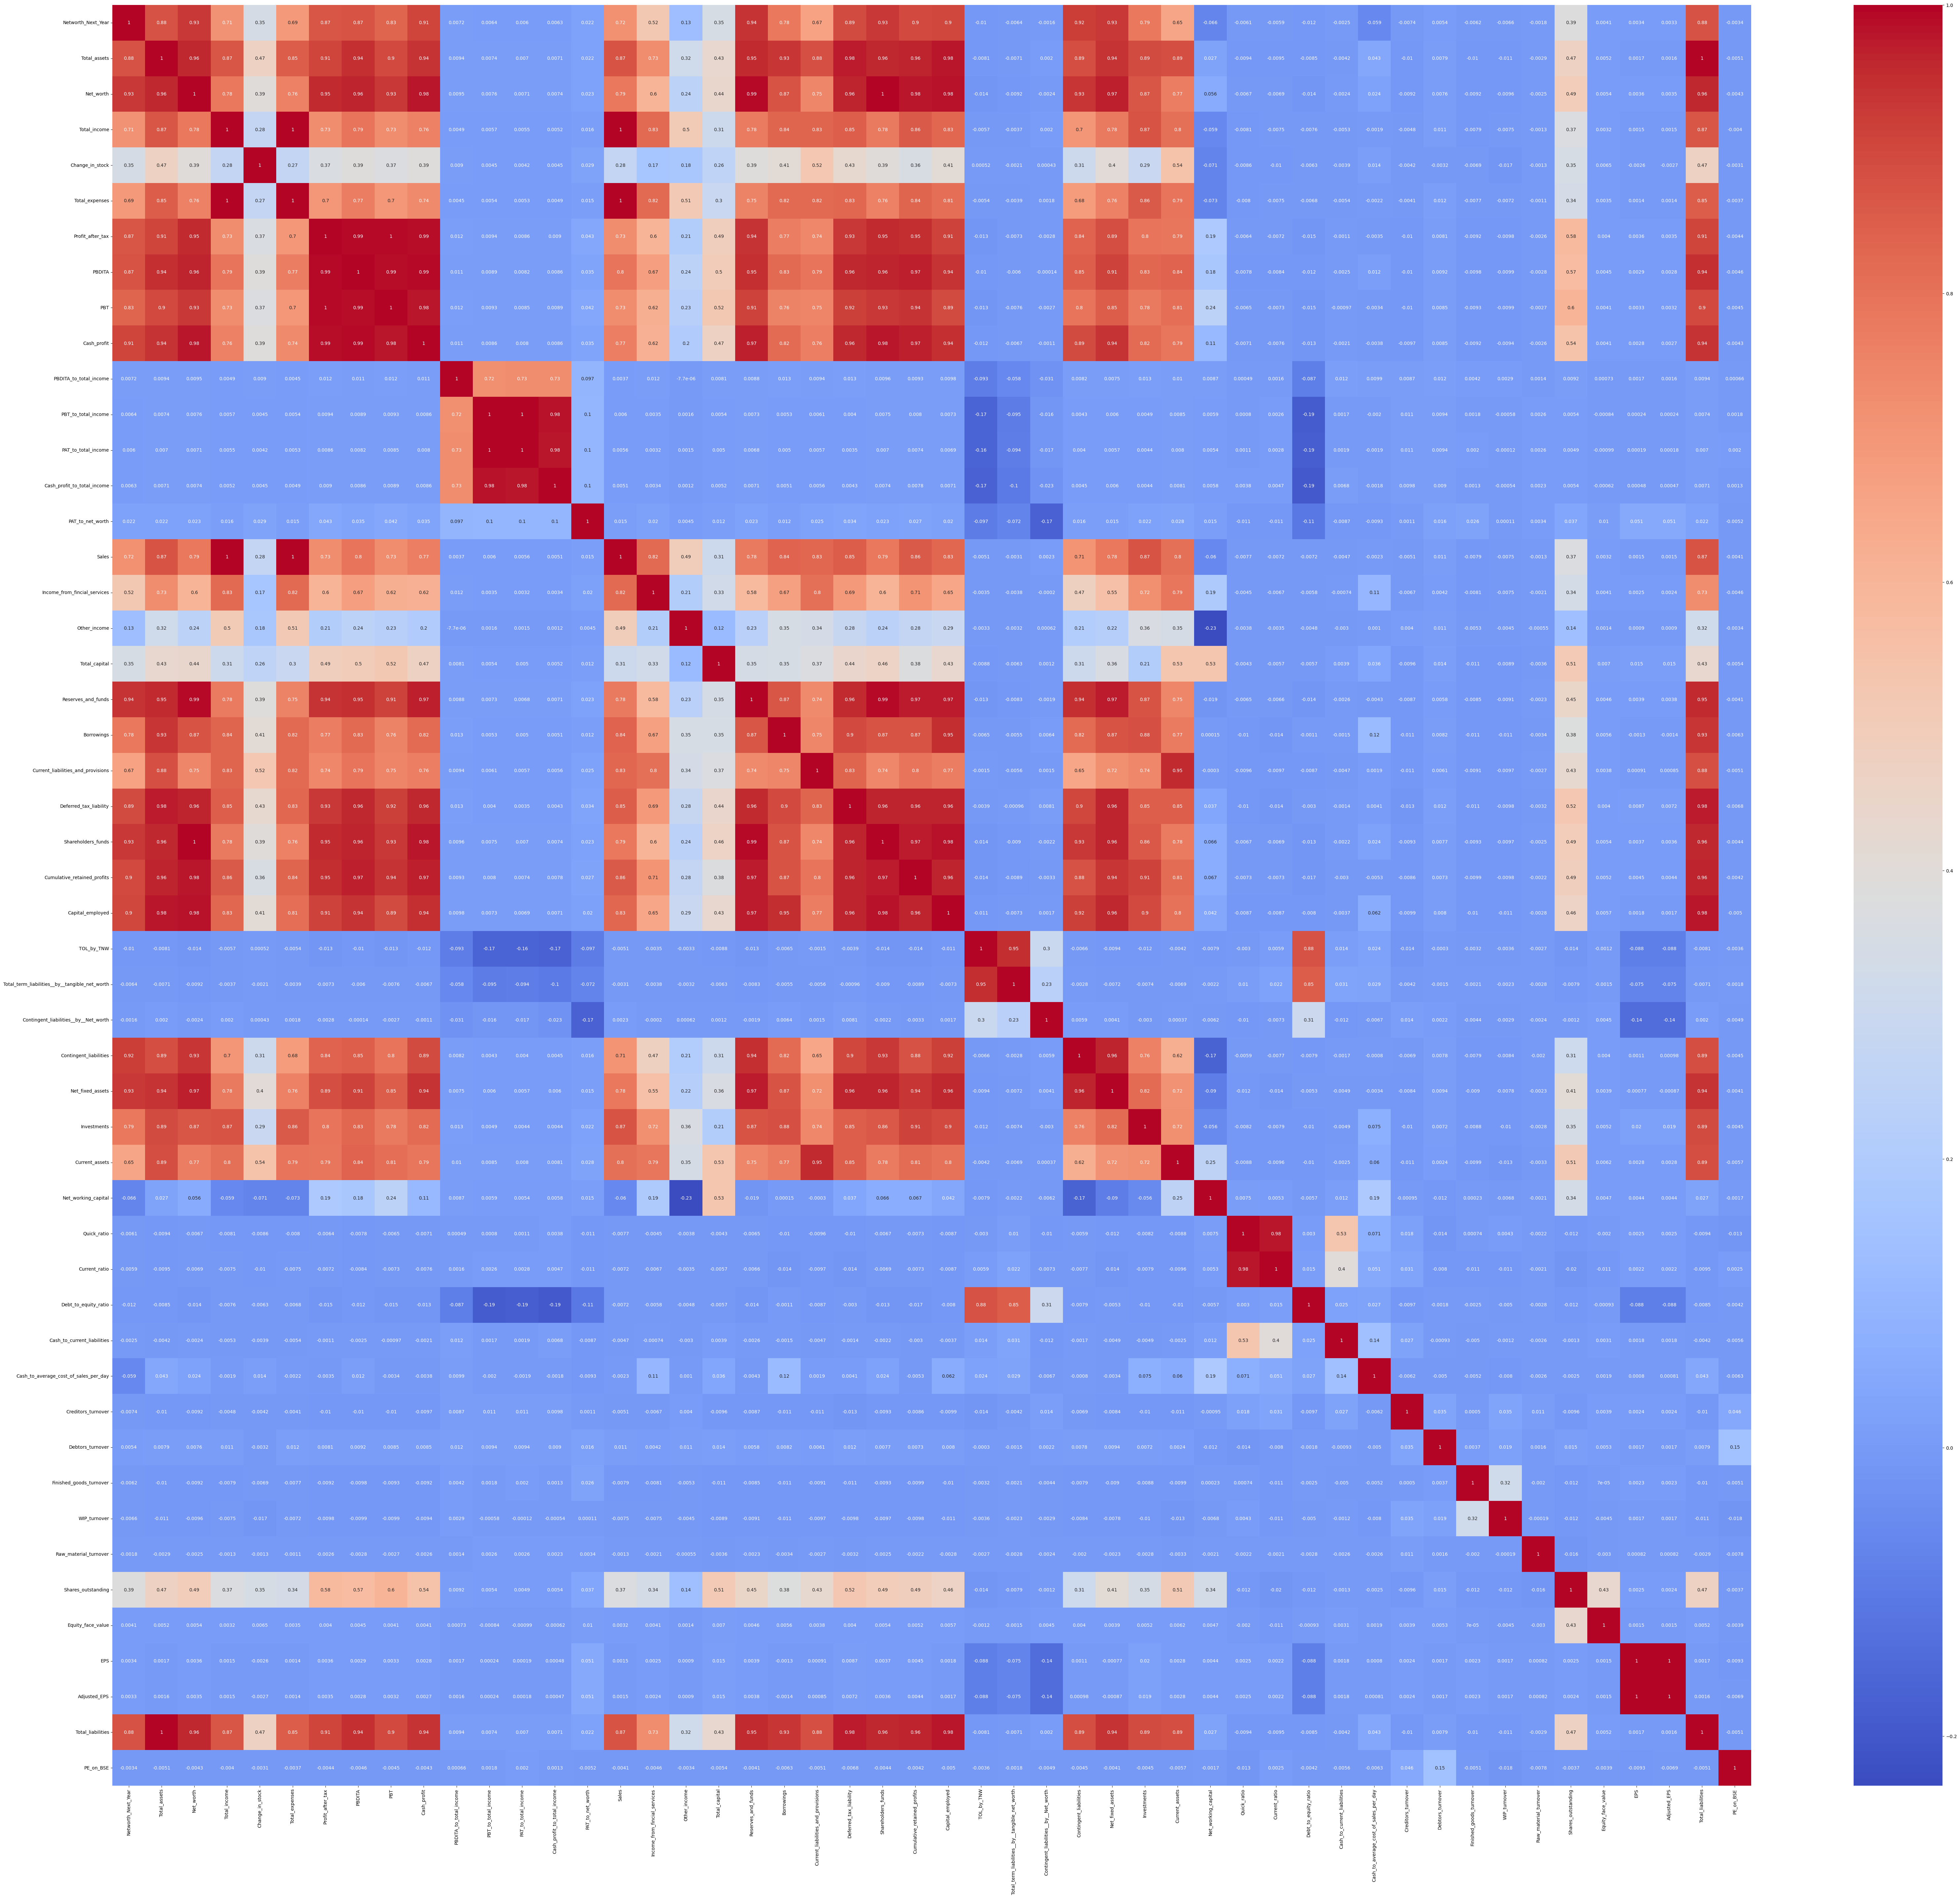

In [21]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(80,70))  # setting the size of figure to 12 by 10

p=sns.heatmap(Company_Default.corr(), annot=True,cmap='coolwarm')

### A company will not be tagged as a defaulter if its net worth next year is positive, or else, it'll be tagged as a defaulter.

In [22]:

Company_Default.loc[Company_Default['Networth_Next_Year'] <= 0, 'Default'] = 1
Company_Default.loc[Company_Default['Networth_Next_Year'] > 0, 'Default'] = 0

#### Now, let us check the basic measures of descriptive statistics for the categorical variables.

In [23]:
Company_Default["Default"].value_counts()

Default
0.0    3352
1.0     904
Name: count, dtype: int64

#### Checking proportion of default

In [24]:
Company_Default.Default.sum() / len(Company_Default.Default)

0.212406015037594

#### Check for missing values

In [25]:
Company_Default.isnull().sum()

Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_to_total_income                              79
PBT_to_total_income                                 79
PAT_to_total_income                                 79
Cash_profit_to_total_income                         79
PAT_to_net_worth                                     0
Sales                                              305
Income_from_fincial_services                      1111
Other_income                                      1556
Total_capi

In [26]:
Company_Default.size

217056

In [27]:
Company_Default.isnull().sum().sum()

17778

There are missing values in the dataset

In [28]:
Company_X = Company_Default.drop('Default', axis = 1)
Company_Y = Company_Default['Default']

In [29]:
Company_X

Networth_Next_Year  Total_assets  Net_worth  Total_income  \
0                  395.3         827.6      336.5         534.1   
1                   36.2          67.7       24.3         137.9   
2                   84.0         238.4       78.9         331.2   
3                 2041.4        6883.5     1443.3        8448.5   
4                   41.8          90.9       47.0         388.6   
...                  ...           ...        ...           ...   
4251                 0.2           0.4        0.2           NaN   
4252                93.3         159.6       86.7         172.9   
4253               932.2         833.8      664.6        2314.7   
4254                64.6          95.0       48.5         110.5   
4255                 0.0         384.6      111.3         345.8   

      Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  \
0                13.5           508.7              38.9   124.4   64.6   
1                -3.7           131.0               3.2     5.5    1.0   
2               -18.1           309.2               3.9    25.8   10.5   
3               212.2          8482.4             178.3   418.4  185.1   
4                 3.4           392.7              -0.7     7.2   -0.6   
...               ...             ...               ...     ...    ...   
4251              NaN             NaN               NaN     NaN    NaN   
4252              0.1           169.7               3.3    18.4    3.7   
4253             32.1          2151.6             195.2   348.4  303.0   
4254              4.6           113.5               1.6     9.7    2.6   
4255             11.3           341.7              15.4    57.6   20.7   

      Cash_profit  ...  Debtors_turnover  Finished_goods_turnover  \
0            95.2  ...              5.65                     3.99   
1             3.8  ...               NaN                      NaN   
2             9.4  ...              2.51                    17.67   
3           178.0  ...              1.91                    18.14   
4             3.9  ...             68.00                    45.87   
...           ...  ...               ...                      ...   
4251          NaN  ...              0.00                      NaN   
4252         12.6  ...              1.80                    11.00   
4253        219.5  ...              6.08                    59.28   
4254          6.7  ...              3.71                    78.99   
4255         34.8  ...              4.71                    53.37   

      WIP_turnover  Raw_material_turnover  Shares_outstanding  \
0             3.37                  14.87           8760056.0   
1              NaN                    NaN                 NaN   
2             8.76                   8.35                 NaN   
3            18.62                  11.11          10000000.0   
4            28.67                  19.93            107315.0   
...            ...                    ...                 ...   
4251           NaN                   0.00                 NaN   
4252          8.28                   9.88           8162700.0   
4253         31.14                   9.87           7479762.0   
4254         11.51                  14.95                 NaN   
4255          8.33                   3.74            960000.0   

      Equity_face_value    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE  
0                  10.0   4.44          4.44              827.6        NaN  
1                   NaN   0.00          0.00               67.7        NaN  
2                   NaN   0.00          0.00              238.4        NaN  
3                  10.0  17.60         17.60             6883.5        NaN  
4                 100.0  -6.52         -6.52               90.9        NaN  
...                 ...    ...           ...                ...        ...  
4251                NaN   0.00          0.00                0.4        NaN  
4252               10.0   0.42          0.42              159.6      16.81  
4253     

#### Let's check the number of outliers per column

In [30]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [31]:
((Company_X > UL) | (Company_X < LL)).sum()

Networth_Next_Year                                624
Total_assets                                      585
Net_worth                                         595
Total_income                                      508
Change_in_stock                                   750
Total_expenses                                    518
Profit_after_tax                                  712
PBDITA                                            584
PBT                                               704
Cash_profit                                       627
PBDITA_to_total_income                            346
PBT_to_total_income                               546
PAT_to_total_income                               610
Cash_profit_to_total_income                       426
PAT_to_net_worth                                  427
Sales                                             500
Income_from_fincial_services                      517
Other_income                                      389
Total_capital               

In [32]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [33]:
Company_X.isnull().sum()

Networth_Next_Year                                 624
Total_assets                                       585
Net_worth                                          595
Total_income                                       739
Change_in_stock                                   1300
Total_expenses                                     683
Profit_after_tax                                   866
PBDITA                                             738
PBT                                                858
Cash_profit                                        781
PBDITA_to_total_income                             425
PBT_to_total_income                                625
PAT_to_total_income                                689
Cash_profit_to_total_income                        505
PAT_to_net_worth                                   427
Sales                                              805
Income_from_fincial_services                      1628
Other_income                                      1945
Total_capi

In [34]:
Company_X.isnull().sum().sum()

43724

In [35]:
Company_X = Company_X.drop([ 'Networth_Next_Year', 'Equity_face_value'], axis = 1)

In [36]:
Company_X.shape

(4256, 48)

In [37]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

#### Let's visually inspect the missing values in our data

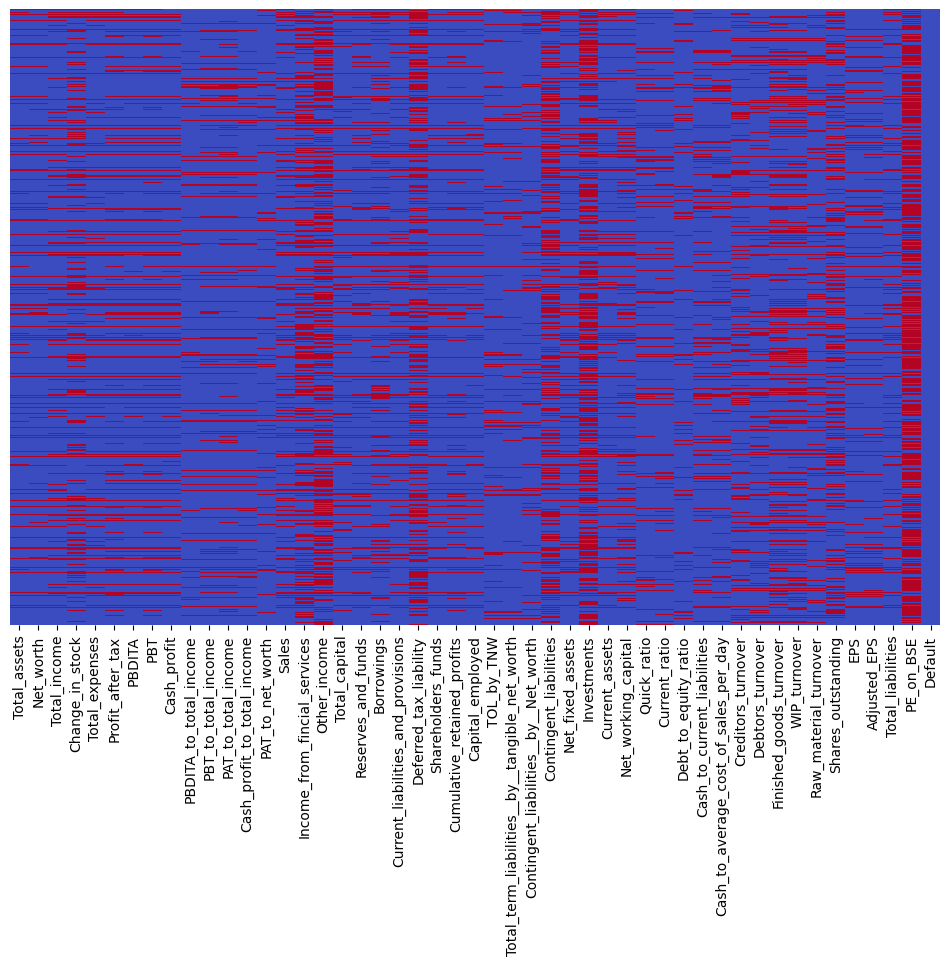

In [38]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

#### We should inspect total missing values by each row.

In [39]:
Company_sub1.isnull().sum(axis = 1)

0        4
1        8
2        3
3       21
4        4
        ..
4251    24
4252     5
4253     8
4254     5
4255     2
Length: 4256, dtype: int64

In [40]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [41]:
Company_sub1_temp.shape

(1657, 49)

In [42]:
Company_sub1_temp['Default'].value_counts()

Default
0.0    1367
1.0     290
Name: count, dtype: int64

In [43]:
290/904

0.32079646017699115

If we consider availability of features for deciding the observations to be considered, we will end up losing more than 90% of the actual defaulters.

In [44]:
Company_sub1['Default'].value_counts()

Default
0.0    3352
1.0     904
Name: count, dtype: int64

In [45]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

PE_on_BSE                                         0.672932
Investments                                       0.508929
Other_income                                      0.457002
Contingent_liabilities                            0.421758
Deferred_tax_liability                            0.417058
Income_from_fincial_services                      0.382519
Change_in_stock                                   0.305451
Shares_outstanding                                0.302162
Finished_goods_turnover                           0.299107
WIP_turnover                                      0.268327
Borrowings                                        0.226269
Profit_after_tax                                  0.203477
PBT                                               0.201598
Net_working_capital                               0.198073
Creditors_turnover                                0.195724
Sales                                             0.189145
Debtors_turnover                                  0.1863

#### Dropping columns with more than 30% missing values 

In [46]:
Company_sub2 = Company_sub1.drop(['PE_on_BSE','Investments','Other_income','Contingent_liabilities','Deferred_tax_liability',
                                  'Income_from_fincial_services'],
                           axis = 1)

In [47]:
Company_sub2.shape

(4256, 43)

#### Segregate the predictors and response 

In [48]:
predictors = Company_sub2.drop('Default', axis = 1)
response = Company_sub2['Default']

#### Scale the predictors 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [50]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

#### Imputing the remaining missing values

In [51]:
from sklearn.impute import KNNImputer

In [52]:
imputer = KNNImputer(n_neighbors=10)

In [53]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [54]:
Company_imputed.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_to_total_income                            0
PBT_to_total_income                               0
PAT_to_total_income                               0
Cash_profit_to_total_income                       0
PAT_to_net_worth                                  0
Sales                                             0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_and_provisions                0
Shareholders

#### Inspect possible correlations between independent variables 

<Axes: >

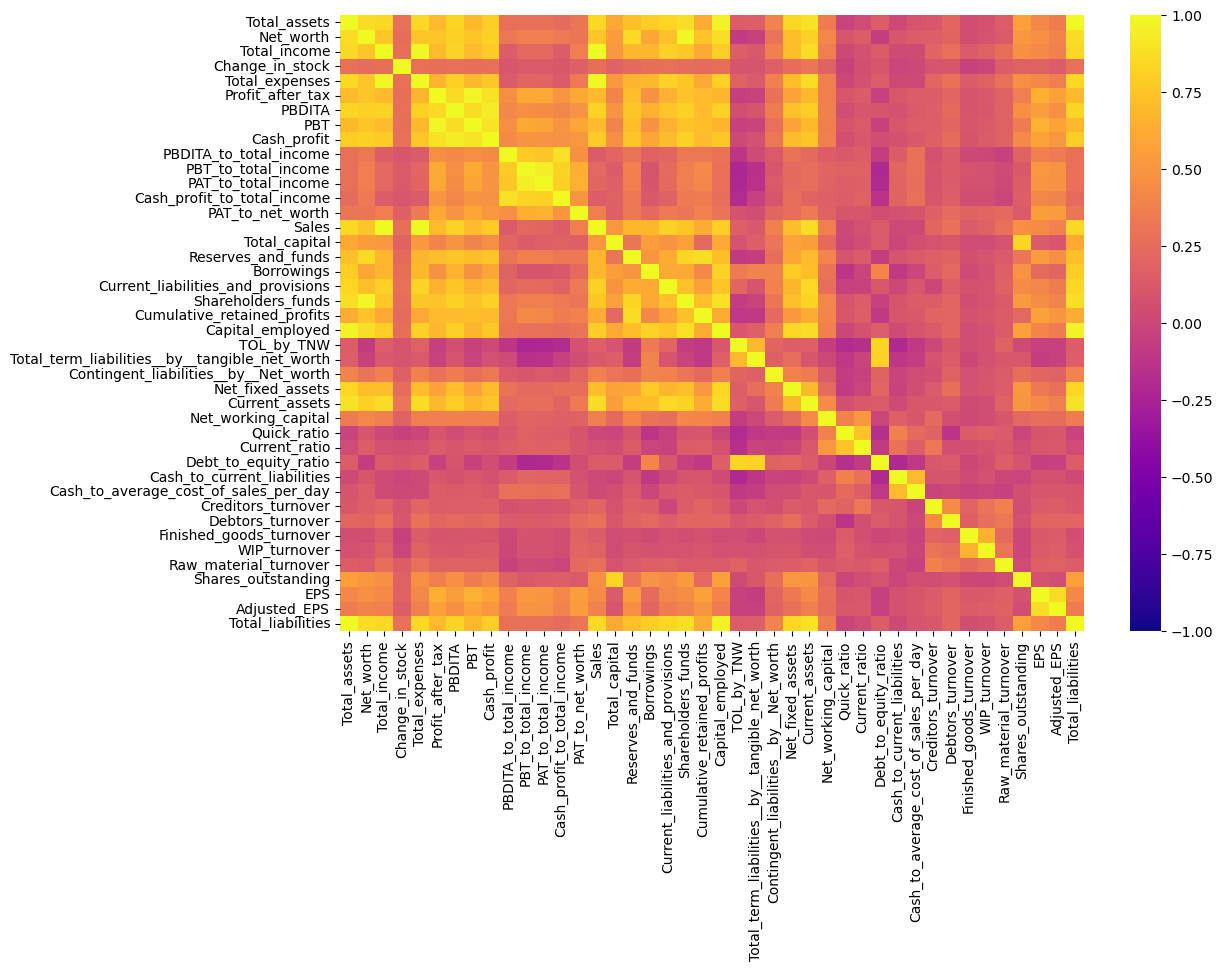

In [55]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('Default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [56]:
predictors = Company_imputed.drop('Default', axis = 1)
response = Company_imputed['Default']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#### Splitting the data into train and test sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.3, random_state = 2)

#### For modeling we will use Logistic Regression with recursive feature elimination

In [59]:
LogR = LogisticRegression()

In [60]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [61]:
selector = selector.fit(X_train, y_train)

In [62]:
selector.n_features_

15

In [63]:
selector.ranking_

array([ 8,  1, 15, 27,  1,  1,  1,  1,  1,  9, 19,  6,  2, 28,  1, 21,  1,
       24, 25,  1,  5,  1, 14, 17,  1, 23,  7, 26, 16,  1, 18, 10, 11, 12,
       13,  1,  4,  3, 20, 22,  1,  1])

In [64]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

Feature  Rank
1                               Net_worth     1
4                          Total_expenses     1
5                        Profit_after_tax     1
6                                  PBDITA     1
7                                     PBT     1
8                             Cash_profit     1
14                                  Sales     1
16                     Reserves_and_funds     1
19                     Shareholders_funds     1
21                       Capital_employed     1
24  Contingent_liabilities__by__Net_worth     1
29                          Current_ratio     1
35                Finished_goods_turnover     1
40                           Adjusted_EPS     1
41                      Total_liabilities     1

#### Validating the model on train and test set 

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [67]:
print(confusion_matrix(y_train, pred_train))

[[2350    2]
 [ 621    6]]


In [68]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      2352
         1.0       0.75      0.01      0.02       627

    accuracy                           0.79      2979
   macro avg       0.77      0.50      0.45      2979
weighted avg       0.78      0.79      0.70      2979



In [69]:
print(confusion_matrix(y_test, pred_test))

[[996   4]
 [276   1]]


In [70]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      1000
         1.0       0.20      0.00      0.01       277

    accuracy                           0.78      1277
   macro avg       0.49      0.50      0.44      1277
weighted avg       0.66      0.78      0.69      1277



We see poor recall score for both train and test

Since only 7% of the total data had defaults, we will now try to balance the data before fiting the model. 

In [71]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [72]:
selector_smote = selector.fit(X_res, y_res)

In [73]:
selector_smote.n_features_

15

In [74]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [75]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.56      0.54      0.55      2352
         1.0       0.56      0.58      0.57      2352

    accuracy                           0.56      4704
   macro avg       0.56      0.56      0.56      4704
weighted avg       0.56      0.56      0.56      4704



In [76]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.80      0.55      0.66      1000
         1.0       0.24      0.51      0.32       277

    accuracy                           0.54      1277
   macro avg       0.52      0.53      0.49      1277
weighted avg       0.68      0.54      0.58      1277



Finally, we are able to achieve a descent recall value without overfitting. Considering the opportunities such as outliers, missing values and correlated features this is a fairly good model. It can be improved if we get better quality data where the features explaining the default are not missing to this extent. Of course we can try other techniques which are not sensitive towards missing values and outliers.

# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

#### Now, Importing statsmodels modules

#### Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’
               data = ‘Data Frame containing the required values’).fit()

In [77]:
import statsmodels.formula.api as SM

## Model 1

Lets check all columns we have in the dataset

In [78]:
predictors.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_to_total_income', 'PBT_to_total_income', 'PAT_to_total_income',
       'Cash_profit_to_total_income', 'PAT_to_net_worth', 'Sales',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_and_provisions', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_by_TNW',
       'Total_term_liabilities__by__tangible_net_worth',
       'Contingent_liabilities__by__Net_worth', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Quick_ratio', 'Current_ratio',
       'Debt_to_equity_ratio', 'Cash_to_current_liabilities',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover',
       'Raw_material_turnover', 'Shares_outstanding', 'EPS', 'Adjusted_EPS',
       'Total_liabiliti

In [79]:
f_1 = 'Default ~ Total_assets + Net_worth + Total_income + Change_in_stock + Total_expenses + Profit_after_tax + PBDITA + PBT + Cash_profit + PBDITA_to_total_income + PBT_to_total_income + PAT_to_total_income + Cash_profit_to_total_income + PAT_to_net_worth + Sales + Total_capital + Reserves_and_funds + Borrowings + Current_liabilities_and_provisions + Shareholders_funds + Cumulative_retained_profits + Capital_employed + TOL_by_TNW + Total_term_liabilities__by__tangible_net_worth + Contingent_liabilities__by__Net_worth + Net_fixed_assets + Current_assets + Net_working_capital + Quick_ratio + Current_ratio + Debt_to_equity_ratio + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + EPS + Adjusted_EPS '

#### Fitting the logistic regression model on 'Default' dataset

In [80]:
Company_imputed.corr()

Total_assets  Net_worth  \
Total_assets                                        1.000000   0.870252   
Net_worth                                           0.870252   1.000000   
Total_income                                        0.851143   0.763246   
Change_in_stock                                     0.273870   0.256120   
Total_expenses                                      0.851044   0.756885   
Profit_after_tax                                    0.700611   0.751169   
PBDITA                                              0.831098   0.808314   
PBT                                                 0.695086   0.751770   
Cash_profit                                         0.792109   0.807793   
PBDITA_to_total_income                              0.276402   0.325307   
PBT_to_total_income                                 0.273845   0.371761   
PAT_to_total_income                                 0.275753   0.365127   
Cash_profit_to_total_income                         0.248667   0.337729   
PAT_to_net_worth                                    0.317503   0.316441   
Sales                                               0.847964   0.759670   
Total_capital                                       0.610136   0.543119   
Reserves_and_funds                                  0.727803   0.852991   
Borrowings                                          0.797068   0.599731   
Current_liabilities_and_provisions                  0.841912   0.728914   
Shareholders_funds                                  0.880447   0.985769   
Cumulative_retained_profits                         0.632579   0.746663   
Capital_employed                                    0.967418   0.876942   
TOL_by_TNW                                          0.149210  -0.084499   
Total_term_liabilities__by__tangible_net_worth      0.157848  -0.034595   
Contingent_liabilities__by__Net_worth               0.393182   0.304024   
Net_fixed_assets                                    0.836307   0.719856   
Current_assets                                      0.896090   0.810875   
Net_working_capital                                 0.352666   0.420757   
Quick_ratio                                        -0.022439   0.101836   
Current_ratio                                       0.036778   0.152692   
Debt_to_equity_ratio                                0.154779  -0.060333   
Cash_to_current_liabilities                         0.018164   0.105267   
Cash_to_average_cost_of_sales_per_day               0.101035   0.150657   
Creditors_turnover                                  0.110423   0.159342   
Debtors_turnover                                    0.204350   0.199882   
Finished_goods_turnover                             0.048449   0.053094   
WIP_turnover                                        0.078026   0.080032   
Raw_material_turnover                               0.154814   0.130083   
Shares_outstanding                                  0.558041   0.509070   
EPS                                                 0.422566   0.470333   
Adjusted_EPS                                        0.354680   0.402421   
Total_liabilities                                   1.000000   0.870252   
Default                                            -0.027853  -0.047724   

                                                Total_income  Change_in_stock  \
Total_assets                                        0.851143         0.273870   
Net_worth                                           0.763246         0.256120   
Total_income                                        1.000000         0.272677   
Change_in_stock                                     0.272677         1.000000   
Total_expenses                                      0.986989         0.277168   
Profit_after_tax                                    0.698484         0.267779   
PBDITA                                              0.827362         0.276516   
PBT                                                 0.706428         0.266912   
Cash_profit       

In [81]:
Company_imputed.drop(['Total_liabilities'],axis=1,inplace=True)

In [82]:
model_1 = SM.logit(formula = f_1, data=Company_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.504548
         Iterations 6


#### Checking the parameters

In [83]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 4256
Model:                          Logit   Df Residuals:                     4214
Method:                           MLE   Df Model:                           41
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.02432
Time:                        23:05:50   Log-Likelihood:                -2147.4
converged:                       True   LL-Null:                       -2200.9
Covariance Type:            nonrobust   LLR p-value:                 8.237e-08
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3578      0.044    -30.838      0.000      -1.444      -1.271
Total_assets                                      -0.3384      0.201     -1.683      0.092      -0.732       0.056
Net_worth                                         -0.2319      0.208     -1.115      0.265      -0.640       0.176
Total_income                                       0.2224      0.333      0.667      0.504      -0.431       0.875
Change_in_stock                                    0.0277      0.047      0.586      0.558      -0.065       0.120
Total_expenses                                     0.5294      0.271      1.954      0.051      -0.002       1.060
Profit_after_tax                                  -0.0451      0.148     -0.305      0.760      -0.335       0.245
PBDITA                                             0.1231      0.117      1.055      0.291      -0.106       0.352
PBT                                               -0.0207      0.152     -0.136      0.892      -0.319       0.277
Cash_profit                                       -0.0359      0.119     -0.302      0.763      -0.269       0.197
PBDITA_to_total_income                            -0.0948      0.088     -1.076      0.282      -0.268       0.078
PBT_to_total_income                                0.0840      0.133      0.632      0.527      -0.177       0.345
PAT_to_total_income                               -0.0019      0.122     -0.016      0.988      -0.242       0.238
Cash_profit_to_total_income                       -0.1575      0.099     -1.585      0.113      -0.352       0.037
PAT_to_net_worth                                   0.0013      0.062      0.021      0.983      -0.119       0.122
Sales                                             -0.6311      0.408     -1.547      0.122      -1.431       0.169
Total_capital                                      0.0847      0.074      1.141      0.254      -0.061       0.230
Reserves_and_funds                                -0.1595      0.092     -1.728      0.084      -0.340       0.021
Borrowings                                        -0.0508      0.083     -0.616      0.538      -0.213       0.111
Current_liabilities_and_provisions                -0.0428      0.090     -0.474      0.636      -0.220       0.134
Shareholders_funds                                 0.2794      0.203      1.374      0.169      -0.119       0.678
Cumulative_retained_profits                       -0.0454      0.080     -0.570      0.569      -0.201       0.111
Capital_employed                                   0.2291      0.177      1.295      0.195      -0.118       0.576
TOL_by_TNW                                        -0.0592      0.075     -0.785      0.433      -0.207       0.089
Total_term_liabilities__by__tangible_net_worth     0.0184      0.069      0.265      0.791      -0.118       0.155
Contingent_liabilitie

Most of the ratio variables are insignificant. 

#### Checking the Variance Inflation Factor

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [85]:
X=predictors
calc_vif(predictors).sort_values(by = 'VIF', ascending = False)

variables         VIF
0                                     Total_assets         inf
41                               Total_liabilities         inf
14                                           Sales  131.649782
2                                     Total_income  108.809103
4                                   Total_expenses   54.141945
1                                        Net_worth   43.466172
19                              Shareholders_funds   41.124173
21                                Capital_employed   26.394973
7                                              PBT   21.950059
5                                 Profit_after_tax   20.968554
8                                      Cash_profit   14.246202
6                                           PBDITA   12.900187
10                             PBT_to_total_income   12.776815
11                             PAT_to_total_income   11.170363
26                                  Current_assets    9.892854
16                              Reserves_and_funds    7.429286
12                     Cash_profit_to_total_income    7.029608
18              Current_liabilities_and_provisions    6.206138
30                            Debt_to_equity_ratio    5.794471
9                           PBDITA_to_total_income    5.733987
17                                      Borrowings    5.353832
20                     Cumulative_retained_profits    5.004437
39                                             EPS    4.963555
25                                Net_fixed_assets    4.904620
40                                    Adjusted_EPS    4.288094
22                                      TOL_by_TNW    4.118524
15                                   Total_capital    3.912192
23  Total_term_liabilities__by__tangible_net_worth    3.532824
38                              Shares_outstanding    3.394687
28                                     Quick_ratio    2.994345
29                                   Current_ratio    2.978454
13                                PAT_to_net_worth    2.580557
31                     Cash_to_current_liabilities    2.479250
32           Cash_to_average_cost_of_sales_per_day    2.312572
36                                    WIP_turnover    1.997342
27                             Net_working_capital    1.858337
35                         Finished_goods_turnover    1.781972
33                              Creditors_turnover    1.710321
34                                Debtors_turnover    1.697580
37                           Raw_material_turnover    1.443669
24           Contingent_liabilities__by__Net_worth    1.315673
3                                  Change_in_stock    1.179425

In [86]:
X = X.drop('Total_assets',axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
13                                           Sales  131.649782
1                                     Total_income  108.809103
3                                   Total_expenses   54.141945
0                                        Net_worth   43.466172
18                              Shareholders_funds   41.124173
40                               Total_liabilities   31.325368
20                                Capital_employed   26.394973
6                                              PBT   21.950059
4                                 Profit_after_tax   20.968554
7                                      Cash_profit   14.246202
5                                           PBDITA   12.900187
9                              PBT_to_total_income   12.776815
10                             PAT_to_total_income   11.170363
25                                  Current_assets    9.892854
15                              Reserves_and_funds    7.429286
11                     Cash_profit_to_total_income    7.029608
17              Current_liabilities_and_provisions    6.206138
29                            Debt_to_equity_ratio    5.794471
8                           PBDITA_to_total_income    5.733987
16                                      Borrowings    5.353832
19                     Cumulative_retained_profits    5.004437
38                                             EPS    4.963555
24                                Net_fixed_assets    4.904620
39                                    Adjusted_EPS    4.288094
21                                      TOL_by_TNW    4.118524
14                                   Total_capital    3.912192
22  Total_term_liabilities__by__tangible_net_worth    3.532824
37                              Shares_outstanding    3.394687
27                                     Quick_ratio    2.994345
28                                   Current_ratio    2.978454
12                                PAT_to_net_worth    2.580557
30                     Cash_to_current_liabilities    2.479250
31           Cash_to_average_cost_of_sales_per_day    2.312572
35                                    WIP_turnover    1.997342
26                             Net_working_capital    1.858337
34                         Finished_goods_turnover    1.781972
32                              Creditors_turnover    1.710321
33                                Debtors_turnover    1.697580
36                           Raw_material_turnover    1.443669
23           Contingent_liabilities__by__Net_worth    1.315673
2                                  Change_in_stock    1.179425

In [87]:
X = X.drop('Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
1                                     Total_income  43.539484
0                                        Net_worth  43.294984
3                                   Total_expenses  43.103651
17                              Shareholders_funds  41.084918
39                               Total_liabilities  31.255299
19                                Capital_employed  26.375296
6                                              PBT  21.940392
4                                 Profit_after_tax  20.937985
7                                      Cash_profit  14.136906
5                                           PBDITA  12.875341
9                              PBT_to_total_income  12.776753
10                             PAT_to_total_income  11.170261
24                                  Current_assets   9.889583
14                              Reserves_and_funds   7.427035
11                     Cash_profit_to_total_income   7.023417
16              Current_liabilities_and_provisions   6.205405
28                            Debt_to_equity_ratio   5.788877
8                           PBDITA_to_total_income   5.717478
15                                      Borrowings   5.352271
18                     Cumulative_retained_profits   4.997429
37                                             EPS   4.955963
23                                Net_fixed_assets   4.896678
38                                    Adjusted_EPS   4.288071
20                                      TOL_by_TNW   4.118206
13                                   Total_capital   3.912031
21  Total_term_liabilities__by__tangible_net_worth   3.530486
36                              Shares_outstanding   3.388672
26                                     Quick_ratio   2.992586
27                                   Current_ratio   2.977554
12                                PAT_to_net_worth   2.574434
29                     Cash_to_current_liabilities   2.463578
30           Cash_to_average_cost_of_sales_per_day   2.311553
34                                    WIP_turnover   1.997178
25                             Net_working_capital   1.856842
33                         Finished_goods_turnover   1.781489
31                              Creditors_turnover   1.709598
32                                Debtors_turnover   1.695488
35                           Raw_material_turnover   1.443660
22           Contingent_liabilities__by__Net_worth   1.315324
2                                  Change_in_stock   1.179085

In [88]:
X = X.drop('Total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
0                                        Net_worth  43.294710
16                              Shareholders_funds  41.082961
38                               Total_liabilities  31.174769
18                                Capital_employed  26.236527
5                                              PBT  21.929146
3                                 Profit_after_tax  20.921349
6                                      Cash_profit  14.118911
8                              PBT_to_total_income  12.776751
4                                           PBDITA  12.480905
9                              PAT_to_total_income  11.151488
23                                  Current_assets   9.887915
13                              Reserves_and_funds   7.427019
10                     Cash_profit_to_total_income   7.022036
2                                   Total_expenses   6.893740
15              Current_liabilities_and_provisions   6.205382
27                            Debt_to_equity_ratio   5.783100
7                           PBDITA_to_total_income   5.704075
14                                      Borrowings   5.345764
17                     Cumulative_retained_profits   4.996975
36                                             EPS   4.953835
22                                Net_fixed_assets   4.895395
37                                    Adjusted_EPS   4.286461
19                                      TOL_by_TNW   4.118092
12                                   Total_capital   3.910116
20  Total_term_liabilities__by__tangible_net_worth   3.527516
35                              Shares_outstanding   3.382688
25                                     Quick_ratio   2.990284
26                                   Current_ratio   2.974483
11                                PAT_to_net_worth   2.573901
28                     Cash_to_current_liabilities   2.455759
29           Cash_to_average_cost_of_sales_per_day   2.299897
33                                    WIP_turnover   1.996992
24                             Net_working_capital   1.856009
32                         Finished_goods_turnover   1.781488
30                              Creditors_turnover   1.709560
31                                Debtors_turnover   1.695364
34                           Raw_material_turnover   1.443625
21           Contingent_liabilities__by__Net_worth   1.315321
1                                  Change_in_stock   1.177950

In [89]:
X = X.drop('Net_worth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
37                               Total_liabilities  31.169340
17                                Capital_employed  25.959404
4                                              PBT  21.871176
2                                 Profit_after_tax  20.921348
5                                      Cash_profit  14.106940
7                              PBT_to_total_income  12.762832
3                                           PBDITA  12.424094
8                              PAT_to_total_income  11.131740
15                              Shareholders_funds  10.822254
22                                  Current_assets   9.886009
9                      Cash_profit_to_total_income   7.021444
12                              Reserves_and_funds   6.960794
1                                   Total_expenses   6.891317
14              Current_liabilities_and_provisions   6.205334
26                            Debt_to_equity_ratio   5.770069
6                           PBDITA_to_total_income   5.703722
13                                      Borrowings   5.333553
16                     Cumulative_retained_profits   4.996819
35                                             EPS   4.953164
21                                Net_fixed_assets   4.895182
36                                    Adjusted_EPS   4.284893
18                                      TOL_by_TNW   4.117896
11                                   Total_capital   3.904501
19  Total_term_liabilities__by__tangible_net_worth   3.527508
34                              Shares_outstanding   3.382670
24                                     Quick_ratio   2.990050
25                                   Current_ratio   2.974462
10                                PAT_to_net_worth   2.570561
27                     Cash_to_current_liabilities   2.455750
28           Cash_to_average_cost_of_sales_per_day   2.298845
32                                    WIP_turnover   1.996464
23                             Net_working_capital   1.855814
31                         Finished_goods_turnover   1.781445
29                              Creditors_turnover   1.708795
30                                Debtors_turnover   1.695141
33                           Raw_material_turnover   1.442690
20           Contingent_liabilities__by__Net_worth   1.314081
0                                  Change_in_stock   1.177948

In [90]:
X = X.drop('Total_liabilities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
4                                              PBT  21.780170
2                                 Profit_after_tax  20.912312
5                                      Cash_profit  14.096848
17                                Capital_employed  13.586146
7                              PBT_to_total_income  12.762481
3                                           PBDITA  12.373568
8                              PAT_to_total_income  11.126614
15                              Shareholders_funds  10.759140
22                                  Current_assets   9.688740
9                      Cash_profit_to_total_income   7.019572
12                              Reserves_and_funds   6.960163
1                                   Total_expenses   6.786976
26                            Debt_to_equity_ratio   5.751445
6                           PBDITA_to_total_income   5.703656
14              Current_liabilities_and_provisions   5.464095
13                                      Borrowings   5.331551
16                     Cumulative_retained_profits   4.996807
35                                             EPS   4.953091
21                                Net_fixed_assets   4.827554
36                                    Adjusted_EPS   4.284595
18                                      TOL_by_TNW   4.101832
11                                   Total_capital   3.903589
19  Total_term_liabilities__by__tangible_net_worth   3.525509
34                              Shares_outstanding   3.382538
24                                     Quick_ratio   2.989402
25                                   Current_ratio   2.970657
10                                PAT_to_net_worth   2.568629
27                     Cash_to_current_liabilities   2.455197
28           Cash_to_average_cost_of_sales_per_day   2.297767
32                                    WIP_turnover   1.995550
23                             Net_working_capital   1.850436
31                         Finished_goods_turnover   1.781443
29                              Creditors_turnover   1.708334
30                                Debtors_turnover   1.692923
33                           Raw_material_turnover   1.440835
20           Contingent_liabilities__by__Net_worth   1.309705
0                                  Change_in_stock   1.174537

In [91]:
X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
4                                      Cash_profit  13.892897
16                                Capital_employed  13.547460
3                                           PBDITA  12.170908
6                              PBT_to_total_income  12.064827
14                              Shareholders_funds  10.750856
7                              PAT_to_total_income  10.727936
21                                  Current_assets   9.685193
2                                 Profit_after_tax   7.869473
8                      Cash_profit_to_total_income   7.017592
11                              Reserves_and_funds   6.960113
1                                   Total_expenses   6.775318
25                            Debt_to_equity_ratio   5.750740
5                           PBDITA_to_total_income   5.699313
13              Current_liabilities_and_provisions   5.463837
12                                      Borrowings   5.329936
15                     Cumulative_retained_profits   4.981161
34                                             EPS   4.946705
20                                Net_fixed_assets   4.823544
35                                    Adjusted_EPS   4.281184
17                                      TOL_by_TNW   4.101824
10                                   Total_capital   3.903178
18  Total_term_liabilities__by__tangible_net_worth   3.524355
33                              Shares_outstanding   3.382345
23                                     Quick_ratio   2.988169
24                                   Current_ratio   2.969222
9                                 PAT_to_net_worth   2.568201
26                     Cash_to_current_liabilities   2.454320
27           Cash_to_average_cost_of_sales_per_day   2.297505
31                                    WIP_turnover   1.994688
22                             Net_working_capital   1.850145
30                         Finished_goods_turnover   1.780551
28                              Creditors_turnover   1.707352
29                                Debtors_turnover   1.691130
32                           Raw_material_turnover   1.440819
19           Contingent_liabilities__by__Net_worth   1.309468
0                                  Change_in_stock   1.174408

In [92]:
X = X.drop('Cash_profit', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
15                                Capital_employed  13.542594
5                              PBT_to_total_income  12.058696
13                              Shareholders_funds  10.670712
6                              PAT_to_total_income  10.660854
20                                  Current_assets   9.673750
3                                           PBDITA   8.047602
10                              Reserves_and_funds   6.913829
1                                   Total_expenses   6.747742
7                      Cash_profit_to_total_income   6.384480
2                                 Profit_after_tax   6.145296
24                            Debt_to_equity_ratio   5.750171
4                           PBDITA_to_total_income   5.549912
12              Current_liabilities_and_provisions   5.461641
11                                      Borrowings   5.323696
14                     Cumulative_retained_profits   4.949426
33                                             EPS   4.942713
19                                Net_fixed_assets   4.781541
34                                    Adjusted_EPS   4.281180
16                                      TOL_by_TNW   4.100252
9                                    Total_capital   3.902760
17  Total_term_liabilities__by__tangible_net_worth   3.523710
32                              Shares_outstanding   3.378863
22                                     Quick_ratio   2.985123
23                                   Current_ratio   2.968896
8                                 PAT_to_net_worth   2.567775
25                     Cash_to_current_liabilities   2.454276
26           Cash_to_average_cost_of_sales_per_day   2.291539
30                                    WIP_turnover   1.985565
21                             Net_working_capital   1.848896
29                         Finished_goods_turnover   1.778266
27                              Creditors_turnover   1.707302
28                                Debtors_turnover   1.690131
31                           Raw_material_turnover   1.440678
18           Contingent_liabilities__by__Net_worth   1.308452
0                                  Change_in_stock   1.174398

In [93]:
X = X.drop('Capital_employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
5                              PBT_to_total_income  12.056419
6                              PAT_to_total_income  10.657554
19                                  Current_assets   9.253055
3                                           PBDITA   8.012468
13                              Shareholders_funds   7.701626
10                              Reserves_and_funds   6.903012
1                                   Total_expenses   6.738717
7                      Cash_profit_to_total_income   6.367282
2                                 Profit_after_tax   6.131936
23                            Debt_to_equity_ratio   5.742449
4                           PBDITA_to_total_income   5.543391
12              Current_liabilities_and_provisions   5.460449
14                     Cumulative_retained_profits   4.940285
32                                             EPS   4.910410
18                                Net_fixed_assets   4.339268
33                                    Adjusted_EPS   4.278840
11                                      Borrowings   4.142788
15                                      TOL_by_TNW   4.096319
9                                    Total_capital   3.902427
16  Total_term_liabilities__by__tangible_net_worth   3.523666
31                              Shares_outstanding   3.376316
21                                     Quick_ratio   2.984393
22                                   Current_ratio   2.968650
8                                 PAT_to_net_worth   2.560190
24                     Cash_to_current_liabilities   2.445870
25           Cash_to_average_cost_of_sales_per_day   2.290830
29                                    WIP_turnover   1.984759
20                             Net_working_capital   1.848575
28                         Finished_goods_turnover   1.777962
26                              Creditors_turnover   1.707276
27                                Debtors_turnover   1.688484
30                           Raw_material_turnover   1.439502
17           Contingent_liabilities__by__Net_worth   1.302299
0                                  Change_in_stock   1.170413

In [94]:
X = X.drop('PBT_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
18                                  Current_assets  9.251724
3                                           PBDITA  7.998028
12                              Shareholders_funds  7.700954
9                               Reserves_and_funds  6.898907
1                                   Total_expenses  6.736205
6                      Cash_profit_to_total_income  6.248586
2                                 Profit_after_tax  6.129941
22                            Debt_to_equity_ratio  5.698268
11              Current_liabilities_and_provisions  5.458636
4                           PBDITA_to_total_income  5.407204
13                     Cumulative_retained_profits  4.924534
31                                             EPS  4.908366
5                              PAT_to_total_income  4.609655
17                                Net_fixed_assets  4.338462
32                                    Adjusted_EPS  4.276591
10                                      Borrowings  4.135305
14                                      TOL_by_TNW  4.090468
8                                    Total_capital  3.902174
15  Total_term_liabilities__by__tangible_net_worth  3.523635
30                              Shares_outstanding  3.360912
20                                     Quick_ratio  2.982996
21                                   Current_ratio  2.966466
7                                 PAT_to_net_worth  2.528912
23                     Cash_to_current_liabilities  2.444259
24           Cash_to_average_cost_of_sales_per_day  2.290306
28                                    WIP_turnover  1.983682
19                             Net_working_capital  1.848429
27                         Finished_goods_turnover  1.777553
25                              Creditors_turnover  1.705882
26                                Debtors_turnover  1.687932
29                           Raw_material_turnover  1.439496
16           Contingent_liabilities__by__Net_worth  1.298070
0                                  Change_in_stock  1.170332

In [95]:
X = X.drop('Current_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
3                                           PBDITA  7.983288
12                              Shareholders_funds  7.205917
9                               Reserves_and_funds  6.895570
6                      Cash_profit_to_total_income  6.220607
2                                 Profit_after_tax  6.129569
1                                   Total_expenses  5.882669
21                            Debt_to_equity_ratio  5.688713
4                           PBDITA_to_total_income  5.382932
13                     Cumulative_retained_profits  4.919685
30                                             EPS  4.899187
5                              PAT_to_total_income  4.608514
11              Current_liabilities_and_provisions  4.463748
31                                    Adjusted_EPS  4.272711
17                                Net_fixed_assets  4.218043
14                                      TOL_by_TNW  4.058166
8                                    Total_capital  3.899140
10                                      Borrowings  3.737973
15  Total_term_liabilities__by__tangible_net_worth  3.465620
29                              Shares_outstanding  3.360668
19                                     Quick_ratio  2.979519
20                                   Current_ratio  2.951334
7                                 PAT_to_net_worth  2.528321
22                     Cash_to_current_liabilities  2.437862
23           Cash_to_average_cost_of_sales_per_day  2.277434
27                                    WIP_turnover  1.958981
18                             Net_working_capital  1.801386
26                         Finished_goods_turnover  1.775888
24                              Creditors_turnover  1.705599
25                                Debtors_turnover  1.664054
28                           Raw_material_turnover  1.439494
16           Contingent_liabilities__by__Net_worth  1.290624
0                                  Change_in_stock  1.164955

In [96]:
X = X.drop('PBDITA', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
11                              Shareholders_funds  7.198628
8                               Reserves_and_funds  6.817984
5                      Cash_profit_to_total_income  6.216095
20                            Debt_to_equity_ratio  5.669430
1                                   Total_expenses  5.350676
3                           PBDITA_to_total_income  5.271123
12                     Cumulative_retained_profits  4.919104
29                                             EPS  4.886325
2                                 Profit_after_tax  4.770087
4                              PAT_to_total_income  4.558801
10              Current_liabilities_and_provisions  4.444305
30                                    Adjusted_EPS  4.259770
16                                Net_fixed_assets  4.094400
13                                      TOL_by_TNW  4.048059
7                                    Total_capital  3.888392
9                                       Borrowings  3.718199
14  Total_term_liabilities__by__tangible_net_worth  3.465575
28                              Shares_outstanding  3.346501
18                                     Quick_ratio  2.979347
19                                   Current_ratio  2.951221
6                                 PAT_to_net_worth  2.519188
21                     Cash_to_current_liabilities  2.435137
22           Cash_to_average_cost_of_sales_per_day  2.277423
26                                    WIP_turnover  1.956026
17                             Net_working_capital  1.799952
25                         Finished_goods_turnover  1.774531
23                              Creditors_turnover  1.704852
24                                Debtors_turnover  1.663471
27                           Raw_material_turnover  1.438806
15           Contingent_liabilities__by__Net_worth  1.290622
0                                  Change_in_stock  1.163913

In [97]:
X = X.drop('Shareholders_funds', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
5                      Cash_profit_to_total_income  6.207692
19                            Debt_to_equity_ratio  5.668709
8                               Reserves_and_funds  5.383456
1                                   Total_expenses  5.327894
3                           PBDITA_to_total_income  5.269708
11                     Cumulative_retained_profits  4.915499
28                                             EPS  4.877467
2                                 Profit_after_tax  4.604105
4                              PAT_to_total_income  4.558595
29                                    Adjusted_EPS  4.259592
10              Current_liabilities_and_provisions  4.226985
12                                      TOL_by_TNW  4.012181
15                                Net_fixed_assets  3.917884
7                                    Total_capital  3.787574
9                                       Borrowings  3.712656
13  Total_term_liabilities__by__tangible_net_worth  3.461946
27                              Shares_outstanding  3.329639
17                                     Quick_ratio  2.975114
18                                   Current_ratio  2.949066
6                                 PAT_to_net_worth  2.496623
20                     Cash_to_current_liabilities  2.435043
21           Cash_to_average_cost_of_sales_per_day  2.275685
25                                    WIP_turnover  1.956026
16                             Net_working_capital  1.795112
24                         Finished_goods_turnover  1.773584
22                              Creditors_turnover  1.703213
23                                Debtors_turnover  1.660949
26                           Raw_material_turnover  1.435513
14           Contingent_liabilities__by__Net_worth  1.289254
0                                  Change_in_stock  1.163242

In [98]:
X = X.drop('Cash_profit_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
18                            Debt_to_equity_ratio  5.660805
7                               Reserves_and_funds  5.383429
1                                   Total_expenses  5.326076
10                     Cumulative_retained_profits  4.914155
27                                             EPS  4.877238
2                                 Profit_after_tax  4.598769
28                                    Adjusted_EPS  4.254777
9               Current_liabilities_and_provisions  4.204259
4                              PAT_to_total_income  4.053324
11                                      TOL_by_TNW  4.007892
14                                Net_fixed_assets  3.873218
6                                    Total_capital  3.787542
8                                       Borrowings  3.693600
12  Total_term_liabilities__by__tangible_net_worth  3.453273
26                              Shares_outstanding  3.329613
16                                     Quick_ratio  2.972732
17                                   Current_ratio  2.948568
3                           PBDITA_to_total_income  2.785987
5                                 PAT_to_net_worth  2.496543
19                     Cash_to_current_liabilities  2.432428
20           Cash_to_average_cost_of_sales_per_day  2.275606
24                                    WIP_turnover  1.955001
15                             Net_working_capital  1.794987
23                         Finished_goods_turnover  1.773581
21                              Creditors_turnover  1.702692
22                                Debtors_turnover  1.655407
25                           Raw_material_turnover  1.435238
13           Contingent_liabilities__by__Net_worth  1.288579
0                                  Change_in_stock  1.161654

In [99]:
X = X.drop('Debt_to_equity_ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
7                               Reserves_and_funds  5.383425
1                                   Total_expenses  5.316590
10                     Cumulative_retained_profits  4.913792
26                                             EPS  4.874680
2                                 Profit_after_tax  4.597908
27                                    Adjusted_EPS  4.254288
9               Current_liabilities_and_provisions  4.116111
4                              PAT_to_total_income  4.048094
14                                Net_fixed_assets  3.858244
6                                    Total_capital  3.785985
8                                       Borrowings  3.611351
25                              Shares_outstanding  3.329508
16                                     Quick_ratio  2.972636
17                                   Current_ratio  2.948443
3                           PBDITA_to_total_income  2.784881
11                                      TOL_by_TNW  2.573250
5                                 PAT_to_net_worth  2.496350
12  Total_term_liabilities__by__tangible_net_worth  2.411576
18                     Cash_to_current_liabilities  2.407212
19           Cash_to_average_cost_of_sales_per_day  2.268623
23                                    WIP_turnover  1.952913
15                             Net_working_capital  1.794908
22                         Finished_goods_turnover  1.773118
20                              Creditors_turnover  1.668313
21                                Debtors_turnover  1.652762
24                           Raw_material_turnover  1.435089
13           Contingent_liabilities__by__Net_worth  1.288079
0                                  Change_in_stock  1.160674

In [100]:
X = X.drop('Reserves_and_funds', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
1                                   Total_expenses  5.236616
25                                             EPS  4.857865
2                                 Profit_after_tax  4.521754
26                                    Adjusted_EPS  4.253969
8               Current_liabilities_and_provisions  4.113171
4                              PAT_to_total_income  4.046197
13                                Net_fixed_assets  3.809390
6                                    Total_capital  3.779194
7                                       Borrowings  3.607526
24                              Shares_outstanding  3.325041
15                                     Quick_ratio  2.968943
16                                   Current_ratio  2.948162
3                           PBDITA_to_total_income  2.784320
9                      Cumulative_retained_profits  2.759445
10                                      TOL_by_TNW  2.569240
5                                 PAT_to_net_worth  2.459176
11  Total_term_liabilities__by__tangible_net_worth  2.409294
17                     Cash_to_current_liabilities  2.404030
18           Cash_to_average_cost_of_sales_per_day  2.263700
22                                    WIP_turnover  1.952606
14                             Net_working_capital  1.790585
21                         Finished_goods_turnover  1.773098
19                              Creditors_turnover  1.668238
20                                Debtors_turnover  1.652485
23                           Raw_material_turnover  1.434757
12           Contingent_liabilities__by__Net_worth  1.287797
0                                  Change_in_stock  1.160422

In [101]:
X = X.drop('Total_expenses', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
24                                             EPS  4.856870
1                                 Profit_after_tax  4.332428
25                                    Adjusted_EPS  4.253725
3                              PAT_to_total_income  4.035344
5                                    Total_capital  3.779134
12                                Net_fixed_assets  3.722924
6                                       Borrowings  3.471118
23                              Shares_outstanding  3.304115
7               Current_liabilities_and_provisions  3.106442
14                                     Quick_ratio  2.967292
15                                   Current_ratio  2.946776
8                      Cumulative_retained_profits  2.741029
2                           PBDITA_to_total_income  2.718105
9                                       TOL_by_TNW  2.564349
4                                 PAT_to_net_worth  2.459138
10  Total_term_liabilities__by__tangible_net_worth  2.392784
16                     Cash_to_current_liabilities  2.385315
17           Cash_to_average_cost_of_sales_per_day  2.233362
21                                    WIP_turnover  1.942666
13                             Net_working_capital  1.773423
20                         Finished_goods_turnover  1.773043
18                              Creditors_turnover  1.647882
19                                Debtors_turnover  1.641452
22                           Raw_material_turnover  1.425544
11           Contingent_liabilities__by__Net_worth  1.287722
0                                  Change_in_stock  1.159982

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
y = Company_Default['Default']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [105]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

## Model 2

In [106]:
f_1 = 'Default ~  Change_in_stock  + Profit_after_tax  + PBDITA_to_total_income  + PAT_to_total_income  + PAT_to_net_worth  + Total_capital  + Borrowings + Current_liabilities_and_provisions  + Cumulative_retained_profits  + TOL_by_TNW + Total_term_liabilities__by__tangible_net_worth + Contingent_liabilities__by__Net_worth + Net_fixed_assets  + Net_working_capital + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + EPS + Adjusted_EPS '

In [107]:
model_2 = SM.logit(formula = f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506392
         Iterations 6


#### Checking the coefficients

In [108]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2952
Method:                           MLE   Df Model:                           26
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01761
Time:                        23:05:56   Log-Likelihood:                -1508.5
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 0.0009911
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3297      0.050    -26.835      0.000      -1.427      -1.233
Change_in_stock                                    0.0150      0.057      0.263      0.793      -0.097       0.127
Profit_after_tax                                   0.0132      0.081      0.162      0.872      -0.147       0.173
PBDITA_to_total_income                            -0.1179      0.075     -1.573      0.116      -0.265       0.029
PAT_to_total_income                               -0.0347      0.089     -0.390      0.697      -0.209       0.140
PAT_to_net_worth                                  -0.0311      0.074     -0.420      0.674      -0.176       0.114
Total_capital                                      0.0814      0.088      0.926      0.354      -0.091       0.254
Borrowings                                         0.0695      0.080      0.866      0.386      -0.088       0.227
Current_liabilities_and_provisions                -0.0015      0.074     -0.021      0.984      -0.147       0.144
Cumulative_retained_profits                       -0.1970      0.069     -2.847      0.004      -0.333      -0.061
TOL_by_TNW                                        -0.0313      0.072     -0.434      0.664      -0.172       0.110
Total_term_liabilities__by__tangible_net_worth     0.0288      0.069      0.418      0.676      -0.106       0.164
Contingent_liabilities__by__Net_worth             -0.0556      0.055     -1.018      0.309      -0.163       0.051
Net_fixed_assets                                   0.0245      0.081      0.303      0.762      -0.134       0.183
Net_working_capital                               -0.0191      0.062     -0.309      0.757      -0.140       0.102
Quick_ratio                                        0.0773      0.081      0.954      0.340      -0.081       0.236
Current_ratio                                     -0.0817      0.080     -1.016      0.310      -0.239       0.076
Cash_to_current_liabilities                       -0.1172      0.073     -1.601      0.109      -0.261       0.026
Cash_to_average_cost_of_sales_per_day              0.0647      0.071      0.911      0.362      -0.074       0.204
Creditors_turnover                                -0.0379      0.062     -0.609      0.543      -0.160       0.084
Debtors_turnover                                   0.0780      0.061      1.277      0.202      -0.042       0.198
Finished_goods_turnover                           -0.1160      0.073     -1.585      0.113      -0.259       0.027
WIP_turnover                                       0.0793      0.070      1.134      0.257      -0.058       0.216
Raw_material_turnover                             -0.0648      0.058     -1.120      0.263      -0.178       0.049
Shares_outstanding                                -0.0035      0.093     -0.038      0.970      -0.186       0.179
EPS                  

Current_liabilities_and_provisions is an insignificant variable, therefore, we will eliminate it.

## Model 3

In [109]:
f_1 = 'Default ~  Change_in_stock  + Profit_after_tax  + PBDITA_to_total_income  + PAT_to_total_income  + PAT_to_net_worth  + Total_capital  + Borrowings   + Cumulative_retained_profits  + TOL_by_TNW + Total_term_liabilities__by__tangible_net_worth + Contingent_liabilities__by__Net_worth + Net_fixed_assets  + Net_working_capital + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + EPS + Adjusted_EPS '

In [110]:
model_3 = SM.logit(formula = f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506392
         Iterations 6


#### Checking the coefficients

In [111]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2953
Method:                           MLE   Df Model:                           25
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01761
Time:                        23:05:56   Log-Likelihood:                -1508.5
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 0.0006483
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3297      0.050    -26.847      0.000      -1.427      -1.233
Change_in_stock                                    0.0149      0.057      0.262      0.793      -0.097       0.127
Profit_after_tax                                   0.0126      0.077      0.163      0.870      -0.139       0.164
PBDITA_to_total_income                            -0.1179      0.075     -1.574      0.115      -0.265       0.029
PAT_to_total_income                               -0.0346      0.089     -0.389      0.697      -0.209       0.139
PAT_to_net_worth                                  -0.0311      0.074     -0.420      0.674      -0.176       0.114
Total_capital                                      0.0812      0.087      0.929      0.353      -0.090       0.253
Borrowings                                         0.0694      0.080      0.867      0.386      -0.087       0.226
Cumulative_retained_profits                       -0.1972      0.068     -2.882      0.004      -0.331      -0.063
TOL_by_TNW                                        -0.0316      0.070     -0.454      0.650      -0.168       0.105
Total_term_liabilities__by__tangible_net_worth     0.0291      0.068      0.429      0.668      -0.104       0.162
Contingent_liabilities__by__Net_worth             -0.0557      0.054     -1.026      0.305      -0.162       0.051
Net_fixed_assets                                   0.0241      0.078      0.307      0.759      -0.130       0.178
Net_working_capital                               -0.0191      0.062     -0.310      0.757      -0.140       0.102
Quick_ratio                                        0.0773      0.081      0.954      0.340      -0.081       0.236
Current_ratio                                     -0.0817      0.080     -1.016      0.310      -0.239       0.076
Cash_to_current_liabilities                       -0.1172      0.073     -1.601      0.109      -0.261       0.026
Cash_to_average_cost_of_sales_per_day              0.0646      0.071      0.913      0.361      -0.074       0.203
Creditors_turnover                                -0.0377      0.061     -0.615      0.538      -0.158       0.082
Debtors_turnover                                   0.0780      0.061      1.277      0.202      -0.042       0.198
Finished_goods_turnover                           -0.1160      0.073     -1.586      0.113      -0.259       0.027
WIP_turnover                                       0.0793      0.070      1.134      0.257      -0.058       0.216
Raw_material_turnover                             -0.0648      0.058     -1.123      0.262      -0.178       0.048
Shares_outstanding                                -0.0036      0.093     -0.039      0.969      -0.186       0.179
EPS                                                0.1529      0.100      1.528      0.127      -0.043       0.349
Adjusted_EPS         

Shares_outstanding is still insignificant, therefore, we will eliminate it

## Model 4

In [112]:
f_1 = 'Default ~  Change_in_stock +  Profit_after_tax  + PBDITA_to_total_income  + PAT_to_total_income  + PAT_to_net_worth  + Total_capital  + Borrowings   + Cumulative_retained_profits  + TOL_by_TNW + Total_term_liabilities__by__tangible_net_worth + Contingent_liabilities__by__Net_worth + Net_fixed_assets  + Net_working_capital + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [113]:
model_4 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506392
         Iterations 6


In [114]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2954
Method:                           MLE   Df Model:                           24
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01761
Time:                        23:05:56   Log-Likelihood:                -1508.5
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 0.0004158
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3293      0.048    -27.425      0.000      -1.424      -1.234
Change_in_stock                                    0.0149      0.057      0.262      0.794      -0.097       0.127
Profit_after_tax                                   0.0124      0.077      0.161      0.872      -0.139       0.164
PBDITA_to_total_income                            -0.1179      0.075     -1.574      0.115      -0.265       0.029
PAT_to_total_income                               -0.0346      0.089     -0.390      0.696      -0.209       0.139
PAT_to_net_worth                                  -0.0311      0.074     -0.420      0.674      -0.176       0.114
Total_capital                                      0.0787      0.058      1.353      0.176      -0.035       0.193
Borrowings                                         0.0692      0.080      0.866      0.386      -0.087       0.226
Cumulative_retained_profits                       -0.1972      0.068     -2.882      0.004      -0.331      -0.063
TOL_by_TNW                                        -0.0315      0.070     -0.452      0.651      -0.168       0.105
Total_term_liabilities__by__tangible_net_worth     0.0290      0.068      0.428      0.669      -0.104       0.162
Contingent_liabilities__by__Net_worth             -0.0557      0.054     -1.026      0.305      -0.162       0.051
Net_fixed_assets                                   0.0239      0.078      0.306      0.760      -0.130       0.177
Net_working_capital                               -0.0192      0.062     -0.312      0.755      -0.140       0.102
Quick_ratio                                        0.0774      0.081      0.956      0.339      -0.081       0.236
Current_ratio                                     -0.0818      0.080     -1.017      0.309      -0.239       0.076
Cash_to_current_liabilities                       -0.1172      0.073     -1.601      0.109      -0.261       0.026
Cash_to_average_cost_of_sales_per_day              0.0646      0.071      0.913      0.361      -0.074       0.203
Creditors_turnover                                -0.0376      0.061     -0.614      0.539      -0.157       0.082
Debtors_turnover                                   0.0781      0.061      1.278      0.201      -0.042       0.198
Finished_goods_turnover                           -0.1161      0.073     -1.587      0.112      -0.259       0.027
WIP_turnover                                       0.0794      0.070      1.135      0.256      -0.058       0.216
Raw_material_turnover                             -0.0648      0.058     -1.123      0.262      -0.178       0.048
EPS                                                0.1530      0.100      1.529      0.126      -0.043       0.349
Adjusted_EPS                                      -0.1524      0.095     -1.608      0.108      -0.338       0.033
=====================

Profit_after_tax is still insignificant, therefore, we will eliminate it

## Model 5

In [115]:
f_1 = 'Default ~  Change_in_stock    + PBDITA_to_total_income  + PAT_to_total_income  + PAT_to_net_worth  + Total_capital  + Borrowings   + Cumulative_retained_profits  + TOL_by_TNW + Total_term_liabilities__by__tangible_net_worth + Contingent_liabilities__by__Net_worth + Net_fixed_assets  + Net_working_capital + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [116]:
model_5 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506397
         Iterations 6


In [117]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2955
Method:                           MLE   Df Model:                           23
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01760
Time:                        23:05:56   Log-Likelihood:                -1508.6
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 0.0002631
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3277      0.048    -27.942      0.000      -1.421      -1.235
Change_in_stock                                    0.0154      0.057      0.272      0.786      -0.096       0.127
PBDITA_to_total_income                            -0.1187      0.075     -1.589      0.112      -0.265       0.028
PAT_to_total_income                               -0.0313      0.086     -0.363      0.717      -0.200       0.138
PAT_to_net_worth                                  -0.0282      0.072     -0.393      0.694      -0.169       0.113
Total_capital                                      0.0803      0.057      1.401      0.161      -0.032       0.193
Borrowings                                         0.0707      0.079      0.889      0.374      -0.085       0.226
Cumulative_retained_profits                       -0.1936      0.065     -2.991      0.003      -0.321      -0.067
TOL_by_TNW                                        -0.0316      0.070     -0.454      0.650      -0.168       0.105
Total_term_liabilities__by__tangible_net_worth     0.0285      0.068      0.420      0.674      -0.104       0.161
Contingent_liabilities__by__Net_worth             -0.0556      0.054     -1.024      0.306      -0.162       0.051
Net_fixed_assets                                   0.0258      0.077      0.333      0.739      -0.126       0.178
Net_working_capital                               -0.0186      0.062     -0.302      0.763      -0.139       0.102
Quick_ratio                                        0.0776      0.081      0.958      0.338      -0.081       0.236
Current_ratio                                     -0.0820      0.080     -1.019      0.308      -0.240       0.076
Cash_to_current_liabilities                       -0.1167      0.073     -1.596      0.111      -0.260       0.027
Cash_to_average_cost_of_sales_per_day              0.0643      0.071      0.909      0.363      -0.074       0.203
Creditors_turnover                                -0.0380      0.061     -0.623      0.534      -0.158       0.082
Debtors_turnover                                   0.0777      0.061      1.273      0.203      -0.042       0.197
Finished_goods_turnover                           -0.1161      0.073     -1.588      0.112      -0.259       0.027
WIP_turnover                                       0.0794      0.070      1.136      0.256      -0.058       0.216
Raw_material_turnover                             -0.0646      0.058     -1.118      0.263      -0.178       0.049
EPS                                                0.1557      0.099      1.579      0.114      -0.038       0.349
Adjusted_EPS                                      -0.1525      0.095     -1.610      0.107      -0.338       0.033
==================================================================================================================
"""

Change_in_stock is still insignificant, therefore, we will eliminate it

## Model 6

In [118]:
f_1 = 'Default ~  PBDITA_to_total_income  + PAT_to_total_income  + PAT_to_net_worth  + Total_capital  + Borrowings   + Cumulative_retained_profits  + TOL_by_TNW + Total_term_liabilities__by__tangible_net_worth + Contingent_liabilities__by__Net_worth + Net_fixed_assets  + Net_working_capital + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [119]:
model_6 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506409
         Iterations 6


In [120]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2956
Method:                           MLE   Df Model:                           22
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01758
Time:                        23:05:57   Log-Likelihood:                -1508.6
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 0.0001655
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3280      0.048    -27.950      0.000      -1.421      -1.235
PBDITA_to_total_income                            -0.1193      0.075     -1.598      0.110      -0.266       0.027
PAT_to_total_income                               -0.0304      0.086     -0.353      0.724      -0.199       0.139
PAT_to_net_worth                                  -0.0274      0.072     -0.382      0.702      -0.168       0.113
Total_capital                                      0.0812      0.057      1.418      0.156      -0.031       0.193
Borrowings                                         0.0715      0.079      0.900      0.368      -0.084       0.227
Cumulative_retained_profits                       -0.1924      0.065     -2.979      0.003      -0.319      -0.066
TOL_by_TNW                                        -0.0308      0.070     -0.442      0.658      -0.167       0.106
Total_term_liabilities__by__tangible_net_worth     0.0283      0.068      0.418      0.676      -0.104       0.161
Contingent_liabilities__by__Net_worth             -0.0550      0.054     -1.014      0.310      -0.161       0.051
Net_fixed_assets                                   0.0264      0.077      0.341      0.733      -0.125       0.178
Net_working_capital                               -0.0177      0.061     -0.288      0.774      -0.138       0.103
Quick_ratio                                        0.0758      0.081      0.939      0.348      -0.082       0.234
Current_ratio                                     -0.0807      0.080     -1.005      0.315      -0.238       0.077
Cash_to_current_liabilities                       -0.1163      0.073     -1.590      0.112      -0.260       0.027
Cash_to_average_cost_of_sales_per_day              0.0642      0.071      0.908      0.364      -0.074       0.203
Creditors_turnover                                -0.0380      0.061     -0.622      0.534      -0.158       0.082
Debtors_turnover                                   0.0772      0.061      1.266      0.206      -0.042       0.197
Finished_goods_turnover                           -0.1171      0.073     -1.603      0.109      -0.260       0.026
WIP_turnover                                       0.0790      0.070      1.131      0.258      -0.058       0.216
Raw_material_turnover                             -0.0629      0.057     -1.096      0.273      -0.175       0.050
EPS                                                0.1565      0.099      1.589      0.112      -0.037       0.350
Adjusted_EPS                                      -0.1531      0.095     -1.617      0.106      -0.339       0.032
==================================================================================================================
"""

PAT_to_total_income is still insignificant, therefore, we will eliminate it

## Model 7

In [121]:
f_1 = 'Default ~   PBDITA_to_total_income    + PAT_to_net_worth  + Total_capital  + Borrowings   + Cumulative_retained_profits  + TOL_by_TNW + Total_term_liabilities__by__tangible_net_worth + Contingent_liabilities__by__Net_worth + Net_fixed_assets  + Net_working_capital + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [122]:
model_7 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506430
         Iterations 6


In [123]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2957
Method:                           MLE   Df Model:                           21
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01754
Time:                        23:05:57   Log-Likelihood:                -1508.7
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 0.0001036
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3281      0.048    -27.956      0.000      -1.421      -1.235
PBDITA_to_total_income                            -0.1351      0.060     -2.252      0.024      -0.253      -0.018
PAT_to_net_worth                                  -0.0390      0.064     -0.613      0.540      -0.164       0.086
Total_capital                                      0.0800      0.057      1.399      0.162      -0.032       0.192
Borrowings                                         0.0731      0.079      0.923      0.356      -0.082       0.228
Cumulative_retained_profits                       -0.1944      0.064     -3.020      0.003      -0.321      -0.068
TOL_by_TNW                                        -0.0280      0.069     -0.406      0.685      -0.163       0.107
Total_term_liabilities__by__tangible_net_worth     0.0302      0.067      0.447      0.655      -0.102       0.162
Contingent_liabilities__by__Net_worth             -0.0552      0.054     -1.018      0.309      -0.161       0.051
Net_fixed_assets                                   0.0272      0.077      0.352      0.725      -0.124       0.179
Net_working_capital                               -0.0175      0.061     -0.285      0.776      -0.138       0.103
Quick_ratio                                        0.0755      0.081      0.936      0.349      -0.083       0.233
Current_ratio                                     -0.0807      0.080     -1.006      0.314      -0.238       0.077
Cash_to_current_liabilities                       -0.1173      0.073     -1.605      0.108      -0.261       0.026
Cash_to_average_cost_of_sales_per_day              0.0635      0.071      0.897      0.370      -0.075       0.202
Creditors_turnover                                -0.0374      0.061     -0.613      0.540      -0.157       0.082
Debtors_turnover                                   0.0776      0.061      1.273      0.203      -0.042       0.197
Finished_goods_turnover                           -0.1174      0.073     -1.607      0.108      -0.261       0.026
WIP_turnover                                       0.0792      0.070      1.133      0.257      -0.058       0.216
Raw_material_turnover                             -0.0614      0.057     -1.073      0.283      -0.174       0.051
EPS                                                0.1554      0.099      1.578      0.115      -0.038       0.348
Adjusted_EPS                                      -0.1551      0.095     -1.641      0.101      -0.340       0.030
==================================================================================================================
"""

TOL_by_TNW is still insignificant, therefore, we will eliminate it

## Model 8

In [124]:
f_1 = 'Default ~   PBDITA_to_total_income    + PAT_to_net_worth  + Total_capital  + Borrowings   + Cumulative_retained_profits   + Total_term_liabilities__by__tangible_net_worth + Contingent_liabilities__by__Net_worth + Net_fixed_assets  + Net_working_capital + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [125]:
model_8 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506458
         Iterations 6


In [126]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2958
Method:                           MLE   Df Model:                           20
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01748
Time:                        23:05:57   Log-Likelihood:                -1508.7
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 6.427e-05
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3289      0.047    -27.993      0.000      -1.422      -1.236
PBDITA_to_total_income                            -0.1308      0.059     -2.216      0.027      -0.246      -0.015
PAT_to_net_worth                                  -0.0418      0.063     -0.661      0.509      -0.166       0.082
Total_capital                                      0.0819      0.057      1.438      0.151      -0.030       0.193
Borrowings                                         0.0668      0.078      0.860      0.390      -0.085       0.219
Cumulative_retained_profits                       -0.1928      0.064     -3.001      0.003      -0.319      -0.067
Total_term_liabilities__by__tangible_net_worth     0.0128      0.052      0.246      0.806      -0.090       0.115
Contingent_liabilities__by__Net_worth             -0.0568      0.054     -1.052      0.293      -0.163       0.049
Net_fixed_assets                                   0.0310      0.077      0.404      0.686      -0.119       0.181
Net_working_capital                               -0.0165      0.061     -0.269      0.788      -0.137       0.104
Quick_ratio                                        0.0754      0.081      0.935      0.350      -0.083       0.233
Current_ratio                                     -0.0794      0.080     -0.990      0.322      -0.237       0.078
Cash_to_current_liabilities                       -0.1122      0.072     -1.560      0.119      -0.253       0.029
Cash_to_average_cost_of_sales_per_day              0.0595      0.070      0.849      0.396      -0.078       0.197
Creditors_turnover                                -0.0354      0.061     -0.583      0.560      -0.155       0.084
Debtors_turnover                                   0.0766      0.061      1.257      0.209      -0.043       0.196
Finished_goods_turnover                           -0.1181      0.073     -1.617      0.106      -0.261       0.025
WIP_turnover                                       0.0795      0.070      1.137      0.255      -0.057       0.216
Raw_material_turnover                             -0.0650      0.057     -1.147      0.251      -0.176       0.046
EPS                                                0.1535      0.098      1.560      0.119      -0.039       0.346
Adjusted_EPS                                      -0.1535      0.094     -1.624      0.104      -0.339       0.032
==================================================================================================================
"""

Total_term_liabilities__by__tangible_net_worth is still insignificant, therefore, we will eliminate it

## Model 9

In [127]:
f_1 = 'Default ~   PBDITA_to_total_income    + PAT_to_net_worth  + Total_capital  + Borrowings   + Cumulative_retained_profits    + Contingent_liabilities__by__Net_worth + Net_fixed_assets  + Net_working_capital + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [128]:
model_9 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506468
         Iterations 6


In [129]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2959
Method:                           MLE   Df Model:                           19
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01746
Time:                        23:05:57   Log-Likelihood:                -1508.8
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 3.758e-05
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.3280      0.047    -28.063      0.000      -1.421      -1.235
PBDITA_to_total_income                   -0.1299      0.059     -2.205      0.027      -0.245      -0.014
PAT_to_net_worth                         -0.0415      0.063     -0.656      0.512      -0.166       0.083
Total_capital                             0.0804      0.057      1.420      0.156      -0.031       0.191
Borrowings                                0.0732      0.073      1.002      0.316      -0.070       0.216
Cumulative_retained_profits              -0.1968      0.062     -3.167      0.002      -0.319      -0.075
Contingent_liabilities__by__Net_worth    -0.0564      0.054     -1.045      0.296      -0.162       0.049
Net_fixed_assets                          0.0311      0.077      0.406      0.685      -0.119       0.181
Net_working_capital                      -0.0167      0.061     -0.272      0.786      -0.137       0.104
Quick_ratio                               0.0744      0.081      0.924      0.355      -0.083       0.232
Current_ratio                            -0.0781      0.080     -0.975      0.329      -0.235       0.079
Cash_to_current_liabilities              -0.1128      0.072     -1.569      0.117      -0.254       0.028
Cash_to_average_cost_of_sales_per_day     0.0595      0.070      0.849      0.396      -0.078       0.197
Creditors_turnover                       -0.0351      0.061     -0.578      0.563      -0.154       0.084
Debtors_turnover                          0.0772      0.061      1.268      0.205      -0.042       0.196
Finished_goods_turnover                  -0.1185      0.073     -1.623      0.105      -0.262       0.025
WIP_turnover                              0.0804      0.070      1.152      0.249      -0.056       0.217
Raw_material_turnover                    -0.0646      0.057     -1.142      0.253      -0.176       0.046
EPS                                       0.1528      0.098      1.553      0.120      -0.040       0.346
Adjusted_EPS                             -0.1535      0.095     -1.624      0.104      -0.339       0.032
=========================================================================================================
"""

Net_working_capital is still insignificant, therefore, we will eliminate it

## Model 10

In [130]:
f_1 = 'Default ~   PBDITA_to_total_income    + PAT_to_net_worth  + Total_capital  + Borrowings   + Cumulative_retained_profits    + Contingent_liabilities__by__Net_worth + Net_fixed_assets   + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [131]:
model_10 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506480
         Iterations 6


In [132]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2960
Method:                           MLE   Df Model:                           18
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01744
Time:                        23:05:57   Log-Likelihood:                -1508.8
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 2.151e-05
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.3283      0.047    -28.072      0.000      -1.421      -1.236
PBDITA_to_total_income                   -0.1292      0.059     -2.195      0.028      -0.244      -0.014
PAT_to_net_worth                         -0.0416      0.063     -0.657      0.511      -0.166       0.083
Total_capital                             0.0787      0.056      1.398      0.162      -0.032       0.189
Borrowings                                0.0702      0.072      0.972      0.331      -0.071       0.212
Cumulative_retained_profits              -0.2008      0.060     -3.327      0.001      -0.319      -0.083
Contingent_liabilities__by__Net_worth    -0.0570      0.054     -1.056      0.291      -0.163       0.049
Net_fixed_assets                          0.0329      0.076      0.431      0.666      -0.117       0.182
Quick_ratio                               0.0740      0.081      0.919      0.358      -0.084       0.232
Current_ratio                            -0.0852      0.076     -1.127      0.260      -0.233       0.063
Cash_to_current_liabilities              -0.1136      0.072     -1.582      0.114      -0.254       0.027
Cash_to_average_cost_of_sales_per_day     0.0599      0.070      0.855      0.393      -0.077       0.197
Creditors_turnover                       -0.0357      0.061     -0.587      0.557      -0.155       0.083
Debtors_turnover                          0.0785      0.061      1.294      0.196      -0.040       0.197
Finished_goods_turnover                  -0.1180      0.073     -1.616      0.106      -0.261       0.025
WIP_turnover                              0.0807      0.070      1.157      0.247      -0.056       0.217
Raw_material_turnover                    -0.0645      0.057     -1.140      0.254      -0.175       0.046
EPS                                       0.1527      0.098      1.551      0.121      -0.040       0.346
Adjusted_EPS                             -0.1548      0.094     -1.640      0.101      -0.340       0.030
=========================================================================================================
"""

Net_fixed_assets is still insignificant, therefore, we will eliminate it

## Model 11

In [133]:
f_1 = 'Default ~   PBDITA_to_total_income    + PAT_to_net_worth  + Total_capital  + Borrowings   + Cumulative_retained_profits  + Contingent_liabilities__by__Net_worth + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [134]:
model_11 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506511
         Iterations 6


In [135]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2961
Method:                           MLE   Df Model:                           17
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01738
Time:                        23:05:57   Log-Likelihood:                -1508.9
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 1.247e-05
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.3268      0.047    -28.127      0.000      -1.419      -1.234
PBDITA_to_total_income                   -0.1246      0.058     -2.156      0.031      -0.238      -0.011
PAT_to_net_worth                         -0.0443      0.063     -0.703      0.482      -0.168       0.079
Total_capital                             0.0854      0.054      1.581      0.114      -0.020       0.191
Borrowings                                0.0884      0.058      1.517      0.129      -0.026       0.203
Cumulative_retained_profits              -0.1952      0.059     -3.314      0.001      -0.311      -0.080
Contingent_liabilities__by__Net_worth    -0.0553      0.054     -1.028      0.304      -0.161       0.050
Quick_ratio                               0.0753      0.080      0.936      0.349      -0.082       0.233
Current_ratio                            -0.0879      0.075     -1.167      0.243      -0.236       0.060
Cash_to_current_liabilities              -0.1134      0.072     -1.580      0.114      -0.254       0.027
Cash_to_average_cost_of_sales_per_day     0.0591      0.070      0.844      0.399      -0.078       0.196
Creditors_turnover                       -0.0369      0.061     -0.608      0.543      -0.156       0.082
Debtors_turnover                          0.0822      0.060      1.371      0.170      -0.035       0.200
Finished_goods_turnover                  -0.1173      0.073     -1.608      0.108      -0.260       0.026
WIP_turnover                              0.0816      0.070      1.171      0.242      -0.055       0.218
Raw_material_turnover                    -0.0645      0.057     -1.141      0.254      -0.175       0.046
EPS                                       0.1563      0.098      1.594      0.111      -0.036       0.348
Adjusted_EPS                             -0.1577      0.094     -1.675      0.094      -0.342       0.027
=========================================================================================================
"""

Creditors_turnover is still insignificant, therefore, we will eliminate it

## Model 12

In [136]:
f_1 = 'Default ~   PBDITA_to_total_income    + PAT_to_net_worth  + Total_capital  + Borrowings   + Cumulative_retained_profits  + Contingent_liabilities__by__Net_worth + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day  + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [137]:
model_12 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506574
         Iterations 6


In [138]:
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2962
Method:                           MLE   Df Model:                           16
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01726
Time:                        23:05:57   Log-Likelihood:                -1509.1
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 7.547e-06
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.3270      0.047    -28.133      0.000      -1.419      -1.235
PBDITA_to_total_income                   -0.1249      0.058     -2.160      0.031      -0.238      -0.012
PAT_to_net_worth                         -0.0434      0.063     -0.689      0.491      -0.167       0.080
Total_capital                             0.0856      0.054      1.585      0.113      -0.020       0.191
Borrowings                                0.0868      0.058      1.490      0.136      -0.027       0.201
Cumulative_retained_profits              -0.1979      0.059     -3.368      0.001      -0.313      -0.083
Contingent_liabilities__by__Net_worth    -0.0538      0.054     -1.003      0.316      -0.159       0.051
Quick_ratio                               0.0758      0.080      0.942      0.346      -0.082       0.234
Current_ratio                            -0.0975      0.074     -1.321      0.186      -0.242       0.047
Cash_to_current_liabilities              -0.1153      0.072     -1.606      0.108      -0.256       0.025
Cash_to_average_cost_of_sales_per_day     0.0621      0.070      0.888      0.375      -0.075       0.199
Debtors_turnover                          0.0694      0.056      1.233      0.217      -0.041       0.180
Finished_goods_turnover                  -0.1179      0.073     -1.615      0.106      -0.261       0.025
WIP_turnover                              0.0770      0.069      1.110      0.267      -0.059       0.213
Raw_material_turnover                    -0.0719      0.055     -1.299      0.194      -0.180       0.037
EPS                                       0.1588      0.098      1.622      0.105      -0.033       0.351
Adjusted_EPS                             -0.1577      0.094     -1.676      0.094      -0.342       0.027
=========================================================================================================
"""

PAT_to_net_worth is still insignificant, therefore, we will eliminate it

## Model 13

In [139]:
f_1 = 'Default ~   PBDITA_to_total_income      + Total_capital  + Borrowings   + Cumulative_retained_profits  + Contingent_liabilities__by__Net_worth + Quick_ratio + Current_ratio  + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day  + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [140]:
model_13 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506654
         Iterations 6


In [141]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2963
Method:                           MLE   Df Model:                           15
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01710
Time:                        23:05:57   Log-Likelihood:                -1509.3
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 4.628e-06
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.3247      0.047    -28.180      0.000      -1.417      -1.233
PBDITA_to_total_income                   -0.1385      0.054     -2.544      0.011      -0.245      -0.032
Total_capital                             0.0858      0.054      1.589      0.112      -0.020       0.192
Borrowings                                0.0866      0.058      1.487      0.137      -0.028       0.201
Cumulative_retained_profits              -0.1999      0.059     -3.400      0.001      -0.315      -0.085
Contingent_liabilities__by__Net_worth    -0.0564      0.054     -1.052      0.293      -0.161       0.049
Quick_ratio                               0.0738      0.080      0.917      0.359      -0.084       0.232
Current_ratio                            -0.0960      0.074     -1.301      0.193      -0.241       0.049
Cash_to_current_liabilities              -0.1154      0.072     -1.607      0.108      -0.256       0.025
Cash_to_average_cost_of_sales_per_day     0.0640      0.070      0.916      0.360      -0.073       0.201
Debtors_turnover                          0.0673      0.056      1.197      0.231      -0.043       0.178
Finished_goods_turnover                  -0.1196      0.073     -1.639      0.101      -0.263       0.023
WIP_turnover                              0.0742      0.069      1.071      0.284      -0.062       0.210
Raw_material_turnover                    -0.0771      0.055     -1.408      0.159      -0.185       0.030
EPS                                       0.1485      0.097      1.534      0.125      -0.041       0.338
Adjusted_EPS                             -0.1643      0.094     -1.753      0.080      -0.348       0.019
=========================================================================================================
"""

Cash_to_average_cost_of_sales_per_day is still insignificant, therefore, we will eliminate it

## Model 14

In [142]:
f_1 = 'Default ~   PBDITA_to_total_income      + Total_capital  + Borrowings   + Cumulative_retained_profits  + Contingent_liabilities__by__Net_worth + Quick_ratio + Current_ratio  + Cash_to_current_liabilities   + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [143]:
model_14 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506794
         Iterations 6


In [144]:
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2964
Method:                           MLE   Df Model:                           14
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01683
Time:                        23:05:58   Log-Likelihood:                -1509.7
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 3.173e-06
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.3263      0.047    -28.227      0.000      -1.418      -1.234
PBDITA_to_total_income                   -0.1277      0.053     -2.406      0.016      -0.232      -0.024
Total_capital                             0.0874      0.054      1.619      0.105      -0.018       0.193
Borrowings                                0.0880      0.058      1.511      0.131      -0.026       0.202
Cumulative_retained_profits              -0.2005      0.059     -3.407      0.001      -0.316      -0.085
Contingent_liabilities__by__Net_worth    -0.0547      0.054     -1.021      0.307      -0.160       0.050
Quick_ratio                               0.0745      0.080      0.926      0.354      -0.083       0.232
Current_ratio                            -0.1005      0.074     -1.366      0.172      -0.245       0.044
Cash_to_current_liabilities              -0.0717      0.053     -1.357      0.175      -0.175       0.032
Debtors_turnover                          0.0637      0.056      1.134      0.257      -0.046       0.174
Finished_goods_turnover                  -0.1206      0.073     -1.652      0.099      -0.264       0.022
WIP_turnover                              0.0720      0.069      1.039      0.299      -0.064       0.208
Raw_material_turnover                    -0.0779      0.055     -1.421      0.155      -0.185       0.030
EPS                                       0.1469      0.097      1.517      0.129      -0.043       0.337
Adjusted_EPS                             -0.1619      0.094     -1.729      0.084      -0.346       0.022
=========================================================================================================
"""

Quick_ratio is still insignificant, therefore, we will eliminate it

## Model 15

In [145]:
f_1 = 'Default ~   PBDITA_to_total_income      + Total_capital  + Borrowings   + Cumulative_retained_profits  + Contingent_liabilities__by__Net_worth  + Current_ratio  + Cash_to_current_liabilities   + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [146]:
model_15 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.506938
         Iterations 6


In [147]:
model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2965
Method:                           MLE   Df Model:                           13
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01655
Time:                        23:05:58   Log-Likelihood:                -1510.2
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 2.146e-06
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.3251      0.047    -28.229      0.000      -1.417      -1.233
PBDITA_to_total_income                   -0.1257      0.053     -2.373      0.018      -0.230      -0.022
Total_capital                             0.0882      0.054      1.635      0.102      -0.018       0.194
Borrowings                                0.0828      0.058      1.426      0.154      -0.031       0.196
Cumulative_retained_profits              -0.1990      0.059     -3.383      0.001      -0.314      -0.084
Contingent_liabilities__by__Net_worth    -0.0546      0.054     -1.021      0.307      -0.160       0.050
Current_ratio                            -0.0511      0.050     -1.020      0.308      -0.149       0.047
Cash_to_current_liabilities              -0.0572      0.050     -1.135      0.256      -0.156       0.042
Debtors_turnover                          0.0442      0.052      0.847      0.397      -0.058       0.147
Finished_goods_turnover                  -0.1157      0.073     -1.593      0.111      -0.258       0.027
WIP_turnover                              0.0789      0.069      1.148      0.251      -0.056       0.213
Raw_material_turnover                    -0.0706      0.054     -1.302      0.193      -0.177       0.036
EPS                                       0.1474      0.097      1.523      0.128      -0.042       0.337
Adjusted_EPS                             -0.1609      0.094     -1.717      0.086      -0.345       0.023
=========================================================================================================
"""

Debtors_turnover is still insignificant, therefore, we will eliminate it

## Model 16

In [148]:
f_1 = 'Default ~   PBDITA_to_total_income      + Total_capital  + Borrowings   + Cumulative_retained_profits  + Contingent_liabilities__by__Net_worth  + Current_ratio  + Cash_to_current_liabilities    + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [149]:
model_16 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.507057
         Iterations 6


In [150]:
model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2966
Method:                           MLE   Df Model:                           12
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01632
Time:                        23:05:58   Log-Likelihood:                -1510.5
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 1.331e-06
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.3265      0.047    -28.274      0.000      -1.418      -1.235
PBDITA_to_total_income                   -0.1224      0.053     -2.318      0.020      -0.226      -0.019
Total_capital                             0.0870      0.054      1.613      0.107      -0.019       0.193
Borrowings                                0.0880      0.058      1.525      0.127      -0.025       0.201
Cumulative_retained_profits              -0.1980      0.059     -3.367      0.001      -0.313      -0.083
Contingent_liabilities__by__Net_worth    -0.0520      0.053     -0.975      0.330      -0.157       0.053
Current_ratio                            -0.0521      0.050     -1.039      0.299      -0.150       0.046
Cash_to_current_liabilities              -0.0538      0.050     -1.072      0.284      -0.152       0.045
Finished_goods_turnover                  -0.1163      0.073     -1.601      0.109      -0.259       0.026
WIP_turnover                              0.0869      0.068      1.279      0.201      -0.046       0.220
Raw_material_turnover                    -0.0598      0.053     -1.137      0.255      -0.163       0.043
EPS                                       0.1483      0.097      1.531      0.126      -0.042       0.338
Adjusted_EPS                             -0.1585      0.094     -1.690      0.091      -0.342       0.025
=========================================================================================================
"""

Contingent_liabilities__by__Net_worth is still insignificant, therefore, we will eliminate it

## Model 17

In [151]:
f_1 = 'Default ~   PBDITA_to_total_income      + Total_capital  + Borrowings   + Cumulative_retained_profits    + Current_ratio  + Cash_to_current_liabilities    + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [152]:
model_17 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.507219
         Iterations 6


In [153]:
model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2967
Method:                           MLE   Df Model:                           11
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01601
Time:                        23:05:58   Log-Likelihood:                -1511.0
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 8.872e-07
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3248      0.047    -28.275      0.000      -1.417      -1.233
PBDITA_to_total_income         -0.1241      0.053     -2.350      0.019      -0.228      -0.021
Total_capital                   0.0814      0.054      1.514      0.130      -0.024       0.187
Borrowings                      0.0745      0.056      1.328      0.184      -0.035       0.184
Cumulative_retained_profits    -0.1988      0.059     -3.381      0.001      -0.314      -0.084
Current_ratio                  -0.0482      0.050     -0.965      0.334      -0.146       0.050
Cash_to_current_liabilities    -0.0556      0.050     -1.109      0.268      -0.154       0.043
Finished_goods_turnover        -0.1173      0.073     -1.615      0.106      -0.260       0.025
WIP_turnover                    0.0866      0.068      1.274      0.203      -0.047       0.220
Raw_material_turnover          -0.0627      0.053     -1.193      0.233      -0.166       0.040
EPS                             0.1460      0.097      1.507      0.132      -0.044       0.336
Adjusted_EPS                   -0.1617      0.094     -1.726      0.084      -0.345       0.022
===============================================================================================
"""

Current_ratio is still insignificant, therefore, we will eliminate it

## Model 18

In [154]:
f_1 = 'Default ~   PBDITA_to_total_income      + Total_capital  + Borrowings   + Cumulative_retained_profits      + Cash_to_current_liabilities    + Finished_goods_turnover + WIP_turnover + Raw_material_turnover  + EPS + Adjusted_EPS '

In [155]:
model_18 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.507376
         Iterations 6


In [156]:
model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2968
Method:                           MLE   Df Model:                           10
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01570
Time:                        23:05:58   Log-Likelihood:                -1511.5
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 5.660e-07
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3225      0.047    -28.284      0.000      -1.414      -1.231
PBDITA_to_total_income         -0.1295      0.053     -2.460      0.014      -0.233      -0.026
Total_capital                   0.0782      0.054      1.458      0.145      -0.027       0.183
Borrowings                      0.0802      0.056      1.436      0.151      -0.029       0.190
Cumulative_retained_profits    -0.2064      0.058     -3.539      0.000      -0.321      -0.092
Cash_to_current_liabilities    -0.0679      0.049     -1.396      0.163      -0.163       0.027
Finished_goods_turnover        -0.1173      0.073     -1.616      0.106      -0.259       0.025
WIP_turnover                    0.0854      0.068      1.258      0.208      -0.048       0.219
Raw_material_turnover          -0.0700      0.052     -1.345      0.178      -0.172       0.032
EPS                             0.1508      0.097      1.557      0.119      -0.039       0.341
Adjusted_EPS                   -0.1655      0.094     -1.766      0.077      -0.349       0.018
===============================================================================================
"""

WIP_turnover is still insignificant, therefore, we will eliminate it

## Model 19

In [157]:
f_1 = 'Default ~   PBDITA_to_total_income      + Total_capital  + Borrowings   + Cumulative_retained_profits      + Cash_to_current_liabilities    + Finished_goods_turnover  + Raw_material_turnover  + EPS + Adjusted_EPS '

In [158]:
model_19 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.507641
         Iterations 6


In [159]:
model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2969
Method:                           MLE   Df Model:                            9
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01519
Time:                        23:05:58   Log-Likelihood:                -1512.3
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 4.572e-07
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3236      0.047    -28.324      0.000      -1.415      -1.232
PBDITA_to_total_income         -0.1303      0.053     -2.473      0.013      -0.234      -0.027
Total_capital                   0.0762      0.054      1.420      0.156      -0.029       0.181
Borrowings                      0.0840      0.056      1.509      0.131      -0.025       0.193
Cumulative_retained_profits    -0.2061      0.058     -3.532      0.000      -0.320      -0.092
Cash_to_current_liabilities    -0.0635      0.048     -1.311      0.190      -0.159       0.031
Finished_goods_turnover        -0.0606      0.055     -1.097      0.273      -0.169       0.048
Raw_material_turnover          -0.0574      0.051     -1.128      0.260      -0.157       0.042
EPS                             0.1468      0.097      1.517      0.129      -0.043       0.336
Adjusted_EPS                   -0.1595      0.093     -1.706      0.088      -0.343       0.024
===============================================================================================
"""

Finished_goods_turnover is still insignificant, therefore, we will eliminate it

## Model 20

In [160]:
f_1 = 'Default ~   PBDITA_to_total_income      + Total_capital  + Borrowings   + Cumulative_retained_profits      + Cash_to_current_liabilities      + Raw_material_turnover  + EPS + Adjusted_EPS '

In [161]:
model_20 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.507846
         Iterations 6


In [162]:
model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2970
Method:                           MLE   Df Model:                            8
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01479
Time:                        23:05:58   Log-Likelihood:                -1512.9
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 3.064e-07
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3192      0.046    -28.379      0.000      -1.410      -1.228
PBDITA_to_total_income         -0.1293      0.053     -2.454      0.014      -0.233      -0.026
Total_capital                   0.0751      0.054      1.400      0.161      -0.030       0.180
Borrowings                      0.0862      0.056      1.548      0.122      -0.023       0.195
Cumulative_retained_profits    -0.2069      0.058     -3.545      0.000      -0.321      -0.093
Cash_to_current_liabilities    -0.0643      0.048     -1.327      0.185      -0.159       0.031
Raw_material_turnover          -0.0700      0.050     -1.408      0.159      -0.168       0.027
EPS                             0.1490      0.097      1.541      0.123      -0.040       0.338
Adjusted_EPS                   -0.1670      0.093     -1.791      0.073      -0.350       0.016
===============================================================================================
"""

Cash_to_current_liabilities is still insignificant, therefore, we will eliminate it

## Model 21

In [163]:
f_1 = 'Default ~   PBDITA_to_total_income  + Total_capital  + Borrowings   + Cumulative_retained_profits  + Raw_material_turnover  + EPS + Adjusted_EPS '

In [164]:
model_21 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.508147
         Iterations 6


In [165]:
model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2971
Method:                           MLE   Df Model:                            7
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01421
Time:                        23:05:58   Log-Likelihood:                -1513.8
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 2.524e-07
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3229      0.046    -28.494      0.000      -1.414      -1.232
PBDITA_to_total_income         -0.1387      0.052     -2.656      0.008      -0.241      -0.036
Total_capital                   0.0733      0.054      1.368      0.171      -0.032       0.178
Borrowings                      0.0964      0.055      1.753      0.080      -0.011       0.204
Cumulative_retained_profits    -0.2130      0.058     -3.671      0.000      -0.327      -0.099
Raw_material_turnover          -0.0710      0.050     -1.429      0.153      -0.168       0.026
EPS                             0.1512      0.097      1.565      0.118      -0.038       0.340
Adjusted_EPS                   -0.1697      0.093     -1.821      0.069      -0.352       0.013
===============================================================================================
"""

Total_capital is still insignificant, therefore, we will eliminate it

## Model 22

In [166]:
f_1 = 'Default ~   PBDITA_to_total_income    + Borrowings   + Cumulative_retained_profits  + Raw_material_turnover  + EPS + Adjusted_EPS '

In [167]:
model_22 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.508457
         Iterations 6


In [168]:
model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2972
Method:                           MLE   Df Model:                            6
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01360
Time:                        23:05:58   Log-Likelihood:                -1514.7
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 2.035e-07
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3171      0.046    -28.545      0.000      -1.408      -1.227
PBDITA_to_total_income         -0.1281      0.052     -2.485      0.013      -0.229      -0.027
Borrowings                      0.1350      0.047      2.869      0.004       0.043       0.227
Cumulative_retained_profits    -0.2177      0.058     -3.740      0.000      -0.332      -0.104
Raw_material_turnover          -0.0715      0.050     -1.440      0.150      -0.169       0.026
EPS                             0.1535      0.097      1.585      0.113      -0.036       0.343
Adjusted_EPS                   -0.1754      0.093     -1.880      0.060      -0.358       0.007
===============================================================================================
"""

Raw_material_turnover is still insignificant, therefore, we will eliminate it

## Model 23

In [169]:
f_1 = 'Default ~   PBDITA_to_total_income    + Borrowings   + Cumulative_retained_profits    + EPS + Adjusted_EPS '

In [170]:
model_23 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.508810
         Iterations 6


In [171]:
model_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2973
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01292
Time:                        23:05:59   Log-Likelihood:                -1515.7
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 1.738e-07
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3111      0.046    -28.592      0.000      -1.401      -1.221
PBDITA_to_total_income         -0.1193      0.051     -2.326      0.020      -0.220      -0.019
Borrowings                      0.1259      0.047      2.698      0.007       0.034       0.217
Cumulative_retained_profits    -0.2211      0.058     -3.796      0.000      -0.335      -0.107
EPS                             0.1494      0.097      1.541      0.123      -0.041       0.340
Adjusted_EPS                   -0.1846      0.093     -1.978      0.048      -0.367      -0.002
===============================================================================================
"""

EPS is still insignificant, therefore, we will eliminate it

## Model 24

In [172]:
f_1 = 'Default ~   PBDITA_to_total_income    + Borrowings   + Cumulative_retained_profits     + Adjusted_EPS '

In [173]:
model_24 = SM.logit(formula =f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.509195
         Iterations 6


In [174]:
model_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2974
Method:                           MLE   Df Model:                            4
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.01217
Time:                        23:05:59   Log-Likelihood:                -1516.9
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 1.501e-07
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3116      0.046    -28.616      0.000      -1.401      -1.222
PBDITA_to_total_income         -0.1112      0.051     -2.183      0.029      -0.211      -0.011
Borrowings                      0.1275      0.047      2.741      0.006       0.036       0.219
Cumulative_retained_profits    -0.1982      0.056     -3.533      0.000      -0.308      -0.088
Adjusted_EPS                   -0.0698      0.056     -1.250      0.211      -0.179       0.040
===============================================================================================
"""

In [175]:
y_prob_pred_train = model_24.predict(Default_train)

In [176]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [177]:
from sklearn import metrics

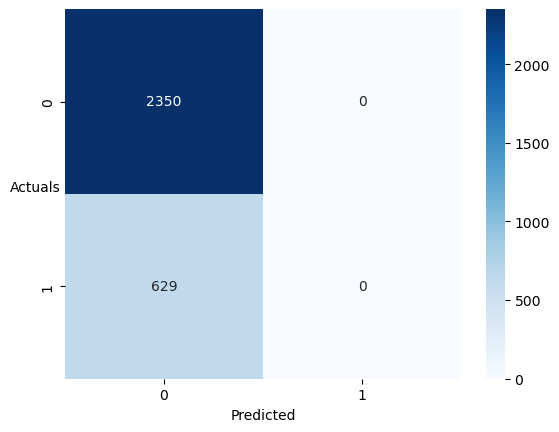

In [178]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## Prediction on the Data

Now, let us see the predicted probability values.

In [179]:
y_prob_pred_24 = model_24.predict()

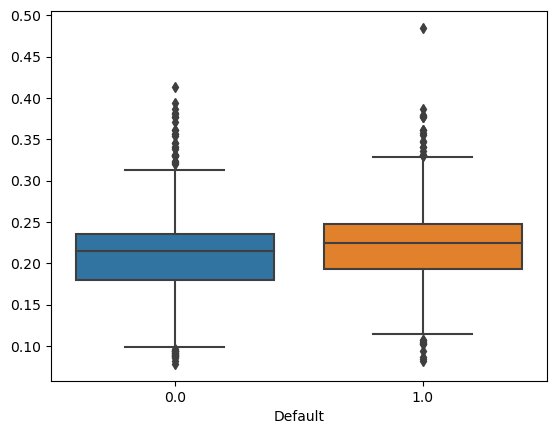

In [180]:
sns.boxplot(x=Default_train['Default'],y=y_prob_pred_24)
plt.xlabel('Default');

#### Choosing the optimal threshold

In [181]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['Default'],y_prob_pred_train)

In [182]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.24484340612148772

#### Validating on the train set with revised threshold

In [183]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

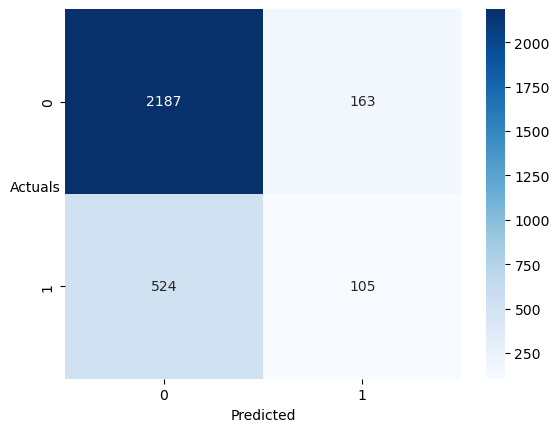

In [184]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [185]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.807     0.931     0.864      2350
         1.0      0.392     0.167     0.234       629

    accuracy                          0.769      2979
   macro avg      0.599     0.549     0.549      2979
weighted avg      0.719     0.769     0.731      2979



#### Validating on the test set

In [186]:
y_prob_pred_test = model_24.predict(Default_test)

In [187]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

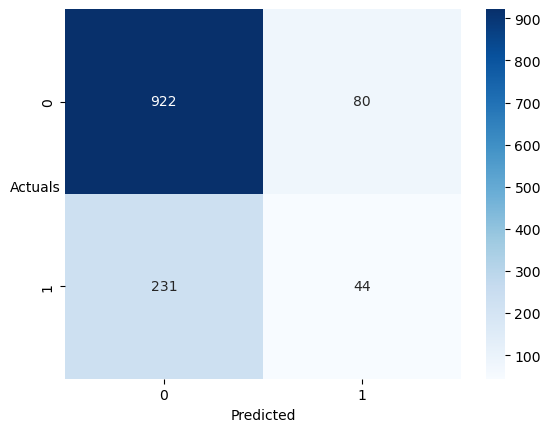

In [188]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [189]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.800     0.920     0.856      1002
         1.0      0.355     0.160     0.221       275

    accuracy                          0.756      1277
   macro avg      0.577     0.540     0.538      1277
weighted avg      0.704     0.756     0.719      1277



In [198]:
f_1

'Default ~   PBDITA_to_total_income    + Borrowings   + Cumulative_retained_profits     + Adjusted_EPS '

In [199]:
Default_train.columns

Index(['Change_in_stock', 'Profit_after_tax', 'PBDITA_to_total_income',
       'PAT_to_total_income', 'PAT_to_net_worth', 'Total_capital',
       'Borrowings', 'Current_liabilities_and_provisions',
       'Cumulative_retained_profits', 'TOL_by_TNW',
       'Total_term_liabilities__by__tangible_net_worth',
       'Contingent_liabilities__by__Net_worth', 'Net_fixed_assets',
       'Net_working_capital', 'Quick_ratio', 'Current_ratio',
       'Cash_to_current_liabilities', 'Cash_to_average_cost_of_sales_per_day',
       'Creditors_turnover', 'Debtors_turnover', 'Finished_goods_turnover',
       'WIP_turnover', 'Raw_material_turnover', 'Shares_outstanding', 'EPS',
       'Adjusted_EPS', 'Default'],
      dtype='object')

In [200]:
X_columns = ['PBDITA_to_total_income','Borrowings','Cumulative_retained_profits', 'Adjusted_EPS']

In [201]:
X_columns

AttributeError: 'list' object has no attribute 'columns'

In [206]:
Equation = "default ="
print(Equation, end=" ")
for i in range(len(X_columns) ):
    if i != len(X_columns) - 1:
        print(
            model_24.params[i],
            "* (",
            X_columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(model_24.params[i], "* (", X_columns[i], ")")

default = -1.311618710470406 * ( PBDITA_to_total_income ) +  -0.11119945913392916 * ( Borrowings ) +  0.12752993242608837 * ( Cumulative_retained_profits ) +  -0.1982275820294953 * ( Adjusted_EPS )


# Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
lda_model = LDA.fit(X_train, y_train)

In [ ]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_train, pred_train_lda))

In [ ]:
print(metrics.classification_report(y_test, pred_test_lda))

In [ ]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

In [ ]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.28:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

In [ ]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.28:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [ ]:
print(metrics.classification_report(y_train, pred_train_rf))

In [ ]:
print(metrics.classification_report(y_test, pred_test_rf))

### Conclusion

Amongst all the models we tried in this case Logistic Regression seems to be best aligned to our objective.

## END